In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

# Exploratory Data Analysis (EDA)

The purpose of this notebook is to perform a full Exploratory data analysis on the Covid-19 patient data that was loaded in the ETL notebook.

<a id="Ind"></a>

1. [Mini ETL](#0)
2. [Domain Knowledge](#a)
2. [Single Variable Exploration](#b)
    - [Death](#b1)
    - [Age](#b2)
    - [Severity](#b3)
    - [Race](#b4)
    - [Myocardial Infarction](#b5)
    - [Peripheral Vascular Disease](#b6)
    - [Congestive Heart Disease](#b7)
    - [Cardiovascular Disease](#b8)
    - [Dementia](#b9)
    - [Chronic Obstructive Pulmonary Disease](#b10)
    - [Diabetes Mellitus Complicated](#b11)
    - [Diabetes Mellitus Simple](#b12)
    - [Renal Disease](#b13)
    - [All Central Nervous System Disease](#b14)
    - [Pure Central Nervous System Disease](#b15)
    - [Stroke](#b16)
    - [Seizure](#b17)
    - [Oxygen Saturation](#b18)
    - [Temperature](#b19)
    - [Mean Arterial Pressure](#b20)
    - [D-Dimer](#b21)
    - [Platelets](#b22)
    - [International Normalized Ratio](#b23)
    - [Blood Urea Nitrogen](#b24)
    - [Creatinine](#b25)
    - [Sodium](#b26)
    - [Glucose](#b27)
    - [Aspartate Aminotransferase](#b28)
    - [Alanine Aminotransferase](#b29)
    - [White Blood Cell](#b30)
    - [Lymphocytes](#b31)
    - [Interleukin6](#b32)
    - [Ferritin](#b33)
    - [C-reactive Protein](#b34)
    - [Procalcitonin](#b35)
    - [Troponin](#b36)
    - [Length of Stay](#b37)
3. [Exploration of Pairwise Relationships](#c)
    - [Death vs. age](#c0)
    - [Death vs. Race](#c01)
    - [Death vs. myocardial infarction](#c1)
    - [Death vs. peripheral vascular disease(PVD)](#c2)
    - [Death vs. congestive heart disease](#c3)
    - [Death vs. chronic obstructive pulmonary disease(COPD)](#c4)
    - [Death vs. diabetes mellitus simple](#c5)
    - [Death vs. renal disease](#c6)
    - [Death vs. all central nervous system disease(CNS)](#c7)
    - [Death vs. stroke](#c8)
    - [Death vs. seizure](#c9)
    - [Death vs. oxygen saturation](#c10)
    - [Death vs. temperature](#c11)
    - [Death vs. mean arterial pressure(MAP)](#c12)
    - [Death vs. D-dimer](#c13)
    - [Death vs. platelets](#c14)
    - [Death vs. creatinine](#c15)
    - [Death vs. Sodium](#c16)
    - [Death vs. Asparate aminotransferase](#c17)
    - [Death vs. Alanine aminotransferase](#c18)
    - [Death vs. White blood cells](#c19)
    - [Death vs. Interleukin-6](#c20)
    - [Death vs. C-reactive Protein](#c21)
    - [Death vs. Procalcitonin](#c22)
    - [Death vs. Troponin](#c23)
    - [Death vs. Length of Stay](#c24)


<a id="0"></a>
## Mini ETL

[Back to Contents](#Ind)

Based on the results in the ETL notebook, there are several variables that we can drop, such as redundant id variables. In addition, we can convert the race variables into one variable, for the purposes of EDA. The dataset conveniently already has dummy variables for race, so we can use those when we develop the linear model. 

In [3]:
import sqlite3
import numpy as np
import pandas as pd

In [4]:
con = sqlite3.connect('data.db')

In [5]:
query = """
SELECT * 
FROM patient
INNER JOIN blood on blood.patient_id = patient.id
"""

df = pd.read_sql_query(query, con)

Let's drop any id variables since we won't need them for analysis.

In [6]:
df = df.drop(['id', 'patient_id'], axis=1)

In [7]:
x = pd.DataFrame(df.iloc[:, 4:8])
df['race'] = x.idxmax(axis=1)

Next, we can create a Race variable from the dummy variables that already exist in the data set and view the basic info about the data set to make sure everything is loaded correctly.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4711 entries, 0 to 4710
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   length_of_stay                         4711 non-null   int64  
 1   age                                    4711 non-null   int64  
 2   death                                  4711 non-null   int64  
 3   severity                               4711 non-null   int64  
 4   black                                  4711 non-null   int64  
 5   white                                  4711 non-null   int64  
 6   asian                                  4711 non-null   int64  
 7   latino                                 4711 non-null   int64  
 8   myocardial_infarction                  4711 non-null   int64  
 9   peripheral_vascular_disease            4711 non-null   int64  
 10  congestive_heart_disease               4711 non-null   int64  
 11  card

In [9]:
df.head()

,length_of_stay,age,death,severity,black,white,asian,latino,myocardial_infarction,peripheral_vascular_disease,...,aspartate_aminotransferase,alanine_aminotransferase,white_blood_cell,lymphocytes,interleukin6,ferritin,C_reactive_protein,procalcitonin,troponin,race
0,1,89,0,3,0,0,0,0,0,0,...,26.0,14.0,5.6,1.4,0.0,0.0,0.4999,0.0,0.01,black
1,2,67,1,7,0,1,0,0,0,1,...,85.0,32.0,12.2,0.3,0.0,885.0,14.9000,0.6,1.20,white
2,2,94,1,7,0,1,0,0,0,1,...,32.0,18.0,6.1,0.5,324.1,629.0,33.9000,1.2,0.00,white
3,15,72,0,9,1,0,0,0,1,0,...,44.0,17.0,3.7,0.5,0.0,816.0,18.4000,7.3,0.05,black
4,9,71,0,7,1,0,0,0,0,0,...,38.0,28.0,5.7,1.4,39.4,1691.0,11.6000,0.0,0.01,black


We have confirmed that the data was loaded properly, and we do not have any null values.

<a id="a"></a>
## Domain Knowledge

[Back to Contents](#Ind)

Pre-exisiting conditions are known to exacerbate Covid-19 infection in patients. COPD, diabetes, cardiovascular diseases, kidney diseases, and various heart diseases are examples of the pre-existing conditions that may increase a patients risk of death when infected with Covid-19. In addition, blood tests are used to assess a patients general health, especially in cases where patients are admitted to the hospital for severe infections. We can outline some of the normal levels expected for each blood test measurement for reference:

- **oxygen saturation:** 95% and 100% is considered normal [[1]](https://my.clevelandclinic.org/health/diagnostics/22447-blood-oxygen-level)

- **temperature:** normal: 97 F to 99 F is considered normal

- **mean arterial pressure:** 70 and 100 mm Hg is normal [[2]](https://www.healthline.com/health/mean-arterial-pressure), where a MAP over 100 mm Hg indicates risk for blood clots or damage to the heart muscles and lower than normal levels indicate possible organ damage from decreased blood flow to organs.

- **D-dimer:** less than 0.50 [[3]](https://www.ncbi.nlm.nih.gov/books/NBK431064/), where greater levels may indicate a blood clot.

- **platelets:** 150,000 to 450,000 platelets per microliter of blood[[4]](https://www.hopkinsmedicine.org/health/conditions-and-diseases/what-are-platelets-and-why-are-they-important)        

- **international normalized ratio:** 1.1 or below, where greater than 2.0 is a blood clot or atrial fibrillation risk [[5]](https://www.mayoclinic.org/tests-procedures/prothrombin-time/about/pac-20384661)      

- **blood urea nitrogen:** 6 to 24 mg/dL (2.1 to 8.5 mmol/L)[[6]](https://www.mayoclinic.org/tests-procedures/blood-urea-nitrogen/about/pac-20384821), where high levels indicate kidney dysfunction.                  

- **creatinine:** 0.7 to 1.3 mg/dL (61.9 to 114.9 µmol/L) for men and 0.6 to 1.1 mg/dL (53 to 97.2 µmol/L) for women [[7]](https://www.mountsinai.org/health-library/tests/creatinine-blood-test), where high levels of creatine, which is a waste product meant to be filtered from the blood, indicates kidney dysfunction. 

- **sodium:** between 135 and 145 milliequivalents per liter (mEq/L) [[8]](https://www.mayoclinic.org/diseases-conditions/hyponatremia/symptoms-causes/syc-20373711) is considered normal. Low sodium, or hyponatremia[[20]](https://www.merckmanuals.com/home/hormonal-and-metabolic-disorders/electrolyte-balance/hyponatremia-low-level-of-sodium-in-the-blood), can indicate heart failure , kidney failure, cirrhosis, or diuretics use. High sodium, or hypernatremia [[21]](https://www.merckmanuals.com/home/hormonal-and-metabolic-disorders/electrolyte-balance/hypernatremia-high-level-of-sodium-in-the-blood), can indicate kidney dysfunction or dehydration. 

- **glucose:** less than 140 mg/dL (7.8 mmol/L) [[9]](https://www.mayoclinic.org/diseases-conditions/diabetes/diagnosis-treatment/drc-20371451), where 141-200 mg/dL indicates pre-diabetes and over 200 mg/dL indicates diabetes.

- **aspartate aminotransferase:** 8 to 33 U/L [[10]](https://www.ucsfhealth.org/medical-tests/aspartate-aminotransferase-(ast)-blood-test), where high AST indicates liver disease or cirrhosis.             

- **alanine aminotransferase:** 4 to 36 U/L [[11]](https://www.ucsfhealth.org/medical-tests/alanine-transaminase-(alt)-blood-test) , where high ALT indicates liver disease or cirrhosis. 

- **white blood cell:** 4,500 to 11,000 WBCs per microliter (4.5 to 11.0 × 109/L) [[12]](https://www.mountsinai.org/health-library/tests/wbc-count), where higher WBC counts can indicate an active infection and lower WBC may indicate vitamin deficiencies, Lupus, rheumatoid arthritis, or side effects from cancer treatment. 

- **lymphocytes:** between 1,000 and 4,800 lymphocytes per microliter of blood. Lymphocytes usually make up 20-40% of white blood cells [[13]](https://www.nhlbi.nih.gov/health/lymphopenia)                  

- **interleukin6:** between 0 and 43.5 pg/ml, although its usually around 5.186 pg/ml [[14]](https://pubmed.ncbi.nlm.nih.gov/33155686/) A high IL-6 may indicate an active inflammatory condition, an increased risk of mortality, and an increased risk for ventilation requirements.        

- **ferritin:** 20 to 250 ng/mL for adult males, 10 to 120 ng/mL for adult females, and 12 to 263 ng/mL for females, 40 years and older. [[15]](https://www.urmc.rochester.edu/encyclopedia/content.aspx?contenttypeid=167&contentid=ferritin_blood) Low levels of ferritin is a sign of low iron levels or anemia. 

- **C-reactive protein:** 0.8-1.0 mg/dL (or 8-10 mg/L) or lower is normal, but most adults have less than 0.3 mg/dL [[16]](https://www.mayoclinic.org/tests-procedures/c-reactive-protein-test/about/pac-20385228). A positive C-reactive protein test indicates an active inflammatory condition. 

- **procalcitonin:** less than 0.1 ng/mL. Levels greater than 0.25 ng/mL can indicate the presence of an infection. [[17]](https://emedicine.medscape.com/article/2096589-overview)                      

- **troponin:** between 0 and 0.04 ng/mL, where higher levels could indicate a heart condition like atrial fibrillation [[18]](https://www.urmc.rochester.edu/encyclopedia/content.aspx?contenttypeid=167&contentid=troponin) or damage to the heart muscle, usually as a result of heart attack.


Therefore, D-dimer, INR, interleukin6, c-reactive protein, procalcitonin, and troponin **can be zero values**. Using these references, we can differentiate between cases where zero indicates that no test was done (missing value) or an actual measurement. In addition, most of the pre-existing conditons in the dataset have a 0 or 1 response, meaning the patient either has the condition or does not. Peripheral Vascular Disease is an exception, since a patient can have Grade I, which is asyptomatic and low severity, Grade II, which means the patient suffers from intermittent claudication and some rest pain, or Grade III, which means the patient has Rest pain or pain during night time and may have minor tissue loss. Grade IV is also possible, although it's much more rare and results in major tissue loss [[19]](https://medicalcriteria.com/web/vasfon/). 

By using these ranges as reference, and our common domain knowledge about the effect that pre-existing conditions have on Covid-19 infection outcomes, we can begin exploring each variable to narrow down important variables for pairwise relationships. 

<a id="b"></a>
## Single Variable Exploration

The problem guiding are analysis is "What features can be used to predict patient outcome after Covid-19 infection results in a hospital admission?" Specifically, we want to determine variables that can be used to predict death from Covid-19 infection using data from patients who were admitted to a hospital, in order to eventually build a linear model. We have 36 total variables, after mini ETL, but we may not use all of them in our pairwise exploration based on the single variable exploration results. 

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
import patsy
from collections import defaultdict

pd.options.display.float_format = '{:20,.4f}'.format

We can write a quick helper function for describing the counts for categorical variables as follows:

In [11]:
def single_categorical(data):
    counts = data.value_counts().sort_index()
    proportions = data.value_counts(normalize=True).sort_index()
    result = pd.concat([counts, proportions], axis=1)
    result.columns = ["counts", "proportions"]
    return pd.DataFrame(result)

<a id="b1"></a>
### Death

[Back to Contents](#Ind)

Our target variable, `death`, is a categorical variable that indicates if a patient passed away from Covid-19 after hospital admission. We can start with looking at the value counts and proportions for the two categories, 1: Died and 0: Survived.

In [12]:
single_categorical(df.death)

,counts,proportions
0,3563,0.7563
1,1148,0.2437


Majority of patients survived Covid-19, but a significant portion died. We can look at the relative frequencies for easier comparison between the categories. Nearly one fourth of patients admitted to the hospital died from Covid-19. Specifically, 75.63% of patients survived while 24.37% of patients died from Covid-19.

<a id="b2"></a>
### Age

[Back to Contents](#Ind)

`age` is a numerical variable that indicates the ages of each patient. We expect the ages to be skewed left, since older patients are more likely to be admitted to the hospital for a Covid-19 infection. We can start with looking at the basic statistics about the variable as follows:

In [13]:
pd.DataFrame(df.age.describe())

,age
count,"4,711.0000"
mean,63.3696
std,16.7018
min,18.0000
25%,54.0000
50%,65.0000
75%,76.0000
max,103.0000


The mean `age` is 63.37 years old, with a standard deviation of 16.70 years. Based on the range, where the ages ranged from 18 to 103 years old, we seem to have an even distribution of ages. However, the median, at 65.00 years old, is slightly higher than the mean. Therefore, the distribution is likely negatively skewed. We can plot the distribution of ages using freeman diaconis bins:

In [14]:
def freeman_diaconis( data):
    quartiles = stats.mstats.mquantiles( data, [0.25, 0.5, 0.75])
    iqr = quartiles[2] - quartiles[ 0]
    n = len( data)
    h = 2.0 * (iqr/n**(1.0/3.0))
    return int(np.ceil( h))

Freeman Diaconis:  3


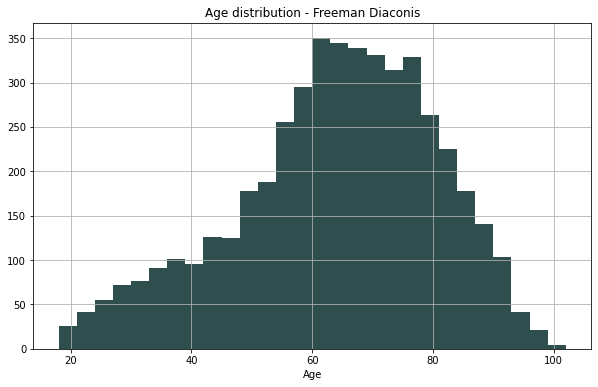

In [15]:
h = freeman_diaconis(df.age)
print("Freeman Diaconis: ", h)
mn = int(df.age.min())
mx = int(df.age.max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.age,bins=bins, color="darkslategray")
axes.set_title("Age distribution - Freeman Diaconis")
axes.set_xlabel("Age")
plt.grid()
plt.show()
plt.close()

As expected, the distribution of ages is negatively skewed, so most patients admitted to the hospital for Covid-19 infection were older. Still, we have a relatively large distribution of ages, ranging from young adults to much older individuals. 

<a id="b3"></a>
### Severity

[Back to Contents](#Ind)

Unfortunately, we do not have access to the metrics used to determine `severity`, which is a discrete, numeric variable ranging from 1 to 11 that indicates the  severity of infection. Therefore, we must be careful about using this variable for any models. We can look at the counts and proportions for each discrete severity level:

In [16]:
single_categorical(df.severity)

,counts,proportions
0,390,0.0828
1,537,0.1140
2,729,0.1547
3,806,0.1711
4,728,0.1545
5,554,0.1176
6,395,0.0838
7,305,0.0647
8,155,0.0329
9,75,0.0159


Most patients were ranked between 0-6, which makes sense when we consider proportion of patients died. Still, it's very difficult to use a variable that was measured in some ambiguous way. Let's visualize the proportions and counts, as follows:

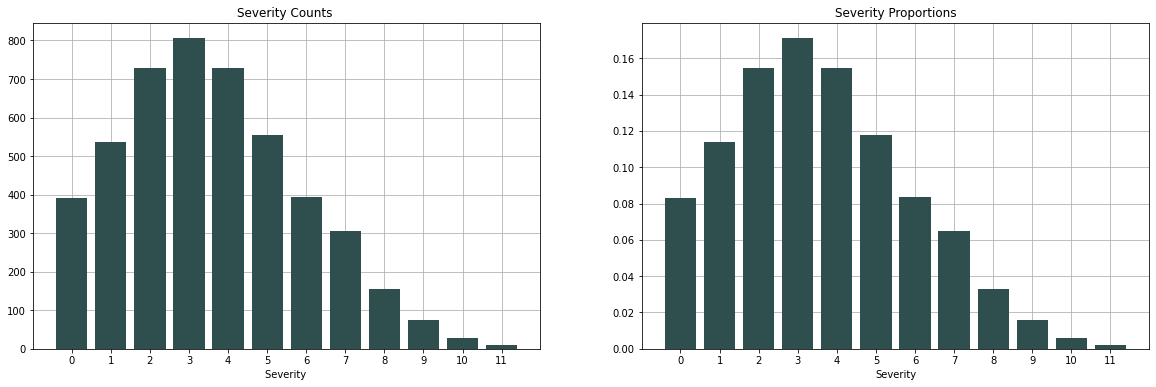

In [17]:
counts = df.severity.value_counts().sort_index()
proportions = df.severity.value_counts(normalize=True).sort_index()
x = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "10", "11"]

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)
axes.bar(x, counts, color="darkslategray", zorder=3)
axes.set_title("Severity Counts ")
axes.set_xlabel("Severity ")
axes.grid(zorder=0)

axes = figure.add_subplot(1, 2, 2)
axes.bar(x, proportions, color="darkslategray", zorder=3)
axes.set_title("Severity Proportions")
axes.set_xlabel("Severity")
axes.grid(zorder=0)

plt.show()
plt.close()

The resulting plots look very 'normal' which seems too perfect to be true for a data-set with over 4,500 patients. How is it possible that clinicians assigned scores this perfectly, where severity level '5' isn't even the slightest out of place, for example? I am reluctant to use this variable in model building because it seems too good to be true, compared to using raw data, since the metrics used to assign these scores is unknown.

<a id="b4"></a>
### Race

[Back to Contents](#Ind)

The data-set conveniently came with dummy variables for race, however, I transformed them back in ETL so we can perform EDA more easily. The `race` variable is a categorical variable that indicates if the patient was asian, black, latino, or white. We can look at the counts and proportions for each race as follows:

In [18]:
single_categorical(df.race)

,counts,proportions
asian,121,0.0257
black,2504,0.5315
latino,1620,0.3439
white,466,0.0989


Most patients were black or latino, which was followed by white and asian. Specifically, 53.15% of patients were black, 34.39% of patients where latino, 9.89% of patients were white, and only 2.57% of patients were asian. We can plot the counts and proportions as follows:

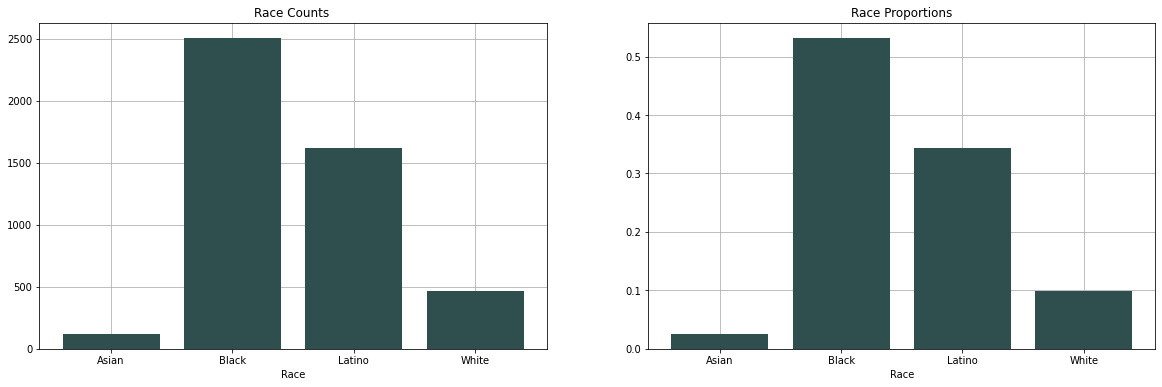

In [19]:
counts = df.race.value_counts().sort_index()
proportions = df.race.value_counts(normalize=True).sort_index()
x = ["Asian", "Black", "Latino", "White"]

figure = plt.figure(figsize=(20, 6))

axes = figure.add_subplot(1, 2, 1)
axes.bar(x, counts, color="darkslategray", zorder=3)
axes.set_title("Race Counts ")
axes.set_xlabel("Race")
axes.grid(zorder=0)

axes = figure.add_subplot(1, 2, 2)
axes.bar(x, proportions, color="darkslategray", zorder=3)
axes.set_title("Race Proportions")
axes.set_xlabel("Race")
axes.grid(zorder=0)

plt.show()
plt.close()

Black and latino sub-groups made up a significant proportion (over 80% combined) of hospitalized Covid-19 patients in this data set. We can expect most of the patients who died from Covid-19, in this data set, to be black or latino. It's interesting to note that these proportions are even more significant when we consider that white individuals make up 76.3% of the population in the U.S. [[22]](https://www.census.gov/quickfacts/fact/table/US/PST045221).

<a id="b5"></a>
### Myocardial Infarction

[Back to Contents](#Ind)

`myocardial_infarction` is a categorical variable that indicates the presence of myocardial infarction in the patient, either as a pre-existing condition or diagnosed during the hospital stay. Myocardial infraction is the medical term for a heart attack. We can start with looking at the counts and proportions:

In [20]:
single_categorical(df.myocardial_infarction)

,counts,proportions
0,4510,0.9573
1,201,0.0427


95.73% of patients have never had a heart attack, while 4.26% have had a heart attack. It will be interesting to see how many of the patient's who have had a heart attack passed away during their hospital stay. 

<a id="b6"></a>
### Peripheral Vascular Disease

[Back to Contents](#Ind)

`peripheral_vascular_disease` (PVD), is a categorical variable that indicates the presence of PVD, which is a circulation disorder that affects blood vessels outside of the heart and the brain, in patients. If we recall our domain knowledge, there are four possible grades of PVD, although grade four is very rare, with increasing severity and symptoms. Let's look at the counts and proportions for each grade:

In [21]:
single_categorical(df.peripheral_vascular_disease)

,counts,proportions
0,3863,0.8200
1,813,0.1726
2,35,0.0074


Patients in this data either do not have PVD or have grade 1 or grade 2 PVD. 81.99% of patients did not have PVD, while 17.26% and 0.75% of patients had grade 1 or grade 2, respectively. 

<a id="b7"></a>
### Congestive Heart Disease

[Back to Contents](#Ind)

`congestive_heart_disease` is a categorical variable that indicates the presence of congestive heart disease in patients, which can usually be determined by many of the blood test results we have in our data set. Let's look at the counts and proportions for both subgroups, those with the condition and those without:

In [22]:
single_categorical(df.congestive_heart_disease)

,counts,proportions
0,4170,0.8852
1,541,0.1148


88.52% of patients do not have congestive heart disease while 11.48% do have congestive heart disease. Like most of the conditions so far, most patients do not have the disease or dysfunction before or during their hospital stay.

<a id="b8"></a>
### Cardiovascular Disease

[Back to Contents](#Ind)

`cardiovascular_disease` is a categorical variable that indicates the presence of cardiovascular disease. Keep in mind that congestive heart disease is a specific kind of cardiovascular disease associated with heart failure, while cardiovascular disease is a blanket term for all conditions related to the cardiovascular system including myocardial infraction. Therefore, this variable may be redundant with the other variables we have already. Nevertheless, let's look at the counts and proportions:

In [23]:
single_categorical(df.cardiovascular_disease)

,counts,proportions
0,4205,0.8926
1,506,0.1074


89.26% of patients do not have a cardiovascular condition, while 10.74% do have a cardiovascular disease. 

<a id="b9"></a>
### Dementia

[Back to Contents](#Ind)

`dementia` is a categorical variable that indicates the presence of dementia. I do not expect this variable to be very significant based on common domain knowledge about pre-existing conditions that affect mortality rates in Covid-19, which was shared by the CDC many times over the course of the pandemic. Still, we can look at the counts and proportions:

In [24]:
single_categorical(df.dementia)

,counts,proportions
0,4339,0.9210
1,372,0.0790


92.10% of patients did not have any symptoms of dementia while 7.90% of patients had signs or a diagnosis of dementia.

<a id="b10"></a>
### Chronic Obstructive Pulmonary Disease 

[Back to Contents](#Ind)

`chronis_obstructive_pulmonary_disease`(COPD) is a categorical variable that indicates the presence of COPD in the patient while in the hospital, whether it was pre-existing or developed during Covid-19 infection. COPD is a progessive lung disease associated with minimized airflow and was well discussed by the CDC as a risk factor for severe illness or death from Covid-19 infection.

In [25]:
single_categorical(df.chronic_obstructive_pulmonary_disease)

,counts,proportions
0,4446,0.9437
1,265,0.0563


94.37% of patients did not have or develop COPD, compared to 5.63% of patients who had COPD during their hospital stay. We can hypothesis that a significant proportion of patients with COPD may have died from Covid-19 infection if they were older or had other conditions. 

<a id="b11"></a>
### Diabetes Mellitus Complicated

[Back to Contents](#Ind)

There are two diabetes variables in the data set with slight differences. The first one is `diabetes_mellitus_complicated`, which is a cateorgical variable that indicates the presence of *complicated* diabetes. Unfortunately, the data set does not specify the exact meaning of complicated. We can assume it means diabetes with complications present, for now. Let's look at the counts and proportions:

In [26]:
single_categorical(df.diabetes_mellitus_complicated)

,counts,proportions
0,4216,0.8949
1,495,0.1051


89.49% of patients did not have signs of complicated diabetes while 10.51% had complicated diabetes during their hospital stay. 

<a id="b12"></a>
### Diabetes Mellitus Simple

[Back to Contents](#Ind)

The second diabetes variable is `diabetes_mellitus_simple`, which is a categorical variable indicating if a patient has *simple* diabetes. Once again, we do not have information about what *simple* means, but we can assume that this means diabetes without complications. Let's look at the counts and proportions:

In [27]:
single_categorical(df.diabetes_mellitus_simple)

,counts,proportions
0,4025,0.8544
1,686,0.1456


85.44% of patients did not have signs of simple diabetes while 14.56% had simple diabetes during their hospital stay. It makes sense that more patients would have diabetes without complications, versus complicated diabetes. However, it seems that patients who have complicated and simple diabetes overlap, since the proportions are so similar. This could cause issues with multicollinearity later on when we attempt the linear model. Therefore, we can opt to use only **one** of these variables, which would likely be simple diabetes.

<a id="b13"></a>
### Renal Disease

[Back to Contents](#Ind)

`renal_disease` is a categorical variable that indicates the presence of kidney disease, which many blood test markers in our data set can detect. Let's look at the counts and proportions:

In [28]:
single_categorical(df.renal_disease)

,counts,proportions
0,3878,0.8232
1,833,0.1768


82.32% of patients did not have signs of kidney disease, while 17.68% of patients had renal disease during their hospital stay. 

<a id="b14"></a>
### All Central Nervous System Disease

[Back to Contents](#Ind)

Once again, we have a situation where a disease type has two variables. The first one is `all_central_nervous_system_disease`, which indicates the presence of any central nervous system condition such as epilepsy, multiple sclerosis (MS) dementia, or a head/spinal injury. Let's look at the counts and proportions, where we expect most patients to be free of a CNS condition:

In [29]:
single_categorical(df.all_central_nervous_system_disease)

,counts,proportions
0,4104,0.8712
1,607,0.1288


As expected, 87.12% of patients did not have signs of any CNS condition while 12.88% of patients had a CNS conditon during their hospital stay. We may benefit from only using this categorical variable, rather than both CNS variables and dementia, to avoid overlap in the information gained from variables. 

<a id="b15"></a>
### Pure Central Nervous System Disease

[Back to Contents](#Ind)

The second CNS variable is `pure_central_nervous_system_disease`, which has an unclear meaning. Based on my own domain knowledge, I can assume that pure CNS means conditions that **only** affect the CNS. Therefore, this variable would not include conditions like dementia which can impact the peripheral nervous system, as well. Therefore, I don't think this variable will be particularly useful, since the previous CNS variable will include these instances already and we want to limit our number of categorical variables for the linear model, later on. We expect the proportion of individuals with pure CNS to be smaller than those with CNS in the previous variable. Let's look at the counts and proportions:

In [30]:
single_categorical(df.pure_central_nervous_system_disease)

,counts,proportions
0,4223,0.8964
1,488,0.1036


As stated, only 10.36% of individuals had pure CNS compared to 12.88% that have any CNS condition. 89.64% of patients did not have pure CNS, but they may have had dementia or another condition that is not localized to the CNS only. 

<a id="b16"></a>
### Stroke

[Back to Contents](#Ind)

`stroke` is a categorical variable that indicates if a patient has had a stroke before or not. Blood clots are known to cause strokes, so blood markers that indicate blood clot risks may correlate with `stroke`. Let's look at the counts and proportions, where we expect a minority of patients to have had strokes:

In [31]:
single_categorical(df.stroke)

,counts,proportions
0,4653,0.9877
1,58,0.0123


98.77% of patients have never had a stroke while only 1.23% of patients had a stroke during their hospital stay.

<a id="b17"></a>
### Seizure

[Back to Contents](#Ind)

`seizure` is a categorical variable that indicates if a patient has ever had a seizure. A seizure could be due to many factors, such as stress from severe infection or epilepsy. We can look at the counts and proportions to see how many patients suffered from seizures during their hospital stay:

In [32]:
single_categorical(df.seizure)

,counts,proportions
0,4673,0.9919
1,38,0.0081


99.19% of patients, or nearly all patient's, have not had a seizure while 0.81% of patients had a seizure during their hospital stay. 

<a id="b18"></a>
### Oxygen Saturation

[Back to Contents](#Ind)

`oxygen saturation` is a numerical variable that indicates a percent of hemoglobin in the blood that is oxygen saturated. According to domain knowledge, a normal oxygen saturation measurement is anywhere from 95-100%, although any oxygen saturation above 92% is usually no cause for concern. We expect patients with Covid-19 to have lower oxygen saturation in severe infections, so we expect the mean to be lower than 92%. Let's look at the descriptive statistics: 

In [33]:
pd.DataFrame(df.oxygen_saturation.describe())

,oxygen_saturation
count,"4,711.0000"
mean,89.5937
std,18.9674
min,0.0000
25%,90.0000
50%,95.0000
75%,98.0000
max,100.0000


The mean oxygen saturation, or $Sp O_2$, is 89.59%, which is considered problematic. The range of values is 0% to 100%, where 0% actually does not make sense. With these missing values, we expect a negatively skewed distribution since the mean is lower than the median, which is 95%. Therefore, we may have some missing values that are affecting the mean. Let's see how many patients have missing values for oxygen saturation:

In [34]:
df[df.oxygen_saturation == 0]

,length_of_stay,age,death,severity,black,white,asian,latino,myocardial_infarction,peripheral_vascular_disease,...,aspartate_aminotransferase,alanine_aminotransferase,white_blood_cell,lymphocytes,interleukin6,ferritin,C_reactive_protein,procalcitonin,troponin,race
72,3,58,0,1,1,0,0,0,0,0,...,29.0000,34.0000,5.7000,1.2000,4.8000,30.0000,0.8000,0.1000,0.0200,black
79,4,60,0,1,0,0,0,0,0,1,...,0.0000,0.0000,3.5000,1.1000,0.0000,299.0000,0.0000,0.0000,0.0000,black
81,9,63,0,4,1,0,0,0,0,0,...,41.0000,22.0000,0.0000,0.0000,0.0000,0.0000,16.4000,0.0000,0.0000,black
118,4,26,0,1,0,0,0,0,1,0,...,24.0000,22.0000,8.1000,1.6000,0.0000,0.0000,0.0000,0.0000,0.0000,black
141,9,66,0,2,1,0,0,0,0,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4557,1,37,0,3,0,0,0,1,0,0,...,41.0000,24.0000,8.7000,0.8000,89.5000,141.0000,11.0000,0.1000,0.0100,latino
4565,1,76,1,5,0,0,0,1,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,latino
4568,13,62,0,4,0,0,0,1,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,latino
4617,0,67,0,2,1,0,0,0,0,0,...,0.0000,0.0000,15.9000,1.4000,0.0000,0.0000,0.0000,0.0000,0.0000,black


There are 167 patients who have missing values for oxygen saturation. Let's try looking at the descriptive statistics if we don't include rows with zero $SpO_2$:

In [35]:
pd.DataFrame(df[df.oxygen_saturation != 0].oxygen_saturation.describe())

,oxygen_saturation
count,"4,544.0000"
mean,92.8864
std,8.1897
min,11.0000
25%,91.0000
50%,95.0000
75%,98.0000
max,100.0000


The mean, at 92.89%, is still less than the median, at 95.00%. Therefore, we expect oxygen saturation to be negatively skewed, regardless of the missing values. We may be able to replace these missing values before modeling, if we find that the relationship with the target variable significant. For now, let's look at a histogram of oxygen saturation:

Freeman Diaconis:  1


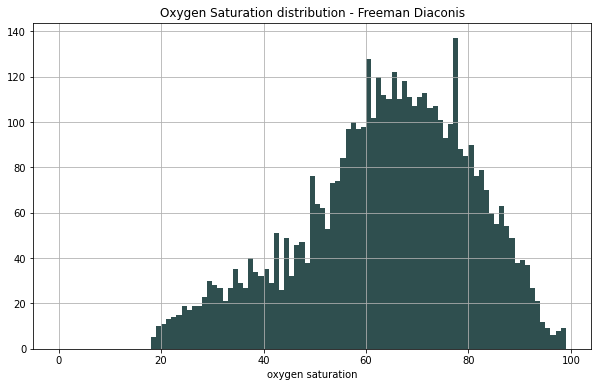

In [36]:
h = freeman_diaconis(df.oxygen_saturation)
print("Freeman Diaconis: ", h)
mn = int(df.oxygen_saturation.min())
mx = int(df.oxygen_saturation.max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.age,bins=bins, color="darkslategray")
axes.set_title("Oxygen Saturation distribution - Freeman Diaconis")
axes.set_xlabel("oxygen saturation")
plt.grid()
plt.show()
plt.close()

The distribution of oxygen saturation is negatively skewed, as expected. Most patients seem to have an oxygen saturation above 60%, but the instances of very low oxygen saturation levels in addition to domain knowledge leads me to believe that this may be a good predictor of severe Covid-19 infection.

<a id="b19"></a>
### Temperature

[Back to Contents](#Ind)

`temperature` is a straight forward, numerical variable that indicates a patients temperature. One thing to keep in mind is that our data set provides the temperatures in Celsius. Even though Celsius is more standard, I am more comfortable with Fahrenheit. Therefore, I will create a new variable to store the Fahrenheit counterparts:

In [37]:
df['temp_F'] = ((9/5) * df.temperature) + 32 

Now, we can look at the descriptive statistics:

In [38]:
pd.DataFrame(df.temp_F.describe())

,temp_F
count,"4,711.0000"
mean,96.4616
std,13.9309
min,-0.0000
25%,98.1000
50%,98.8000
75%,99.9000
max,122.0000


The mean temperature was 96.46 degrees Fahrenheit, which is a bit lower than expected but is still considered somewhat normal since temperature measurements are sometimes taken from the armpit or forehead. The maximum and minimum temperatures are odd. First, we can't be 0 degrees, since hypothermia begins when the body drops below 95 degrees F. Second, we can't be 122 degrees, since a majority of people die when their temperature exceeds 108 degrees F (The world record for highest body temperature was 115 degrees F [[23]](https://www.npr.org/sections/goatsandsoda/2014/11/14/364060441/you-might-be-surprised-when-you-take-your-temperature)). Let's look more closely at the abnormal temperature values:

In [39]:
df[(df.temp_F <= 95) | (df.temp_F >= 108)]

,length_of_stay,age,death,severity,black,white,asian,latino,myocardial_infarction,peripheral_vascular_disease,...,alanine_aminotransferase,white_blood_cell,lymphocytes,interleukin6,ferritin,C_reactive_protein,procalcitonin,troponin,race,temp_F
72,3,58,0,1,1,0,0,0,0,0,...,34.0000,5.7000,1.2000,4.8000,30.0000,0.8000,0.1000,0.0200,black,32.0000
79,4,60,0,1,0,0,0,0,0,1,...,0.0000,3.5000,1.1000,0.0000,299.0000,0.0000,0.0000,0.0000,black,-0.0000
81,9,63,0,4,1,0,0,0,0,0,...,22.0000,0.0000,0.0000,0.0000,0.0000,16.4000,0.0000,0.0000,black,32.0000
110,3,26,0,0,1,0,0,0,0,0,...,19.0000,7.1000,0.5000,0.0000,0.0000,0.0000,0.0999,0.0000,black,32.0000
118,4,26,0,1,0,0,0,0,1,0,...,22.0000,8.1000,1.6000,0.0000,0.0000,0.0000,0.0000,0.0000,black,32.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4565,1,76,1,5,0,0,0,1,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,latino,32.0000
4568,13,62,0,4,0,0,0,1,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,latino,32.0000
4577,6,61,0,6,0,0,0,1,0,0,...,33.0000,11.8000,0.9000,0.0000,"3,336.0000",44.6000,4.3000,0.0100,latino,94.9000
4617,0,67,0,2,1,0,0,0,0,0,...,0.0000,15.9000,1.4000,0.0000,0.0000,0.0000,0.0000,0.0000,black,32.0000


There are 217 patients with abnormal temperatures. These values could be distorting the mean, as well. Let's look at the descriptive statistics without these abnormal values:

In [40]:
pd.DataFrame(df[(df.temp_F >= 95) & (df.temp_F <= 108)].temp_F.describe())

,temp_F
count,"4,498.0000"
mean,99.2087
std,1.5365
min,95.0000
25%,98.2000
50%,98.8000
75%,100.0000
max,107.0000


These results are much more realistic. The mean temperature is 99.21 degrees F, which is normal or a low grade fever. The mean is slightly greater than the median, so we may see a positively skewed distribution when we don't include the abnormal values. Let's plot both histograms, for comparison:

Freeman Diaconis:  1


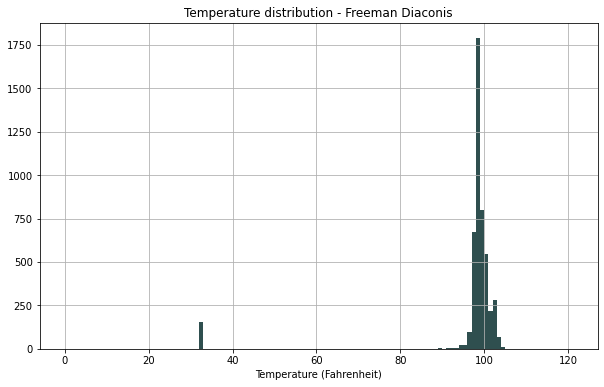

In [41]:
h = freeman_diaconis(df.temp_F)
print("Freeman Diaconis: ", h)
mn = int(df.temp_F.min())
mx = int(df.temp_F.max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.temp_F,bins=bins, color="darkslategray")
axes.set_title("Temperature distribution - Freeman Diaconis")
axes.set_xlabel("Temperature (Fahrenheit)")
#axes.set_xlim(0, 50)
plt.grid()
plt.show()
plt.close()

The abnormal values distort the histogram, and there seems to be a cluster of abnormal temperatures around 30-35 degrees F, which again, is impossible. How about the histogram of temperatures without the abnormal values?

Freeman Diaconis:  1


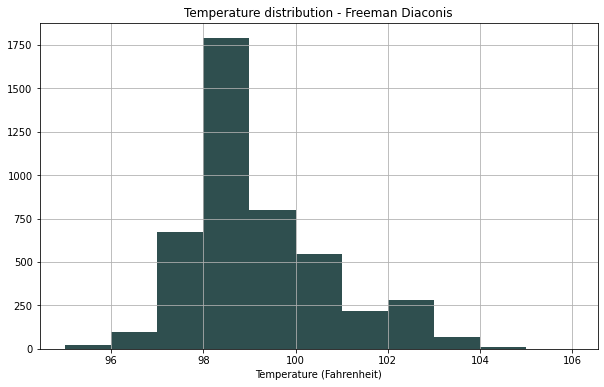

In [42]:
h = freeman_diaconis(df[(df.temp_F >= 95) & (df.temp_F <= 108)].temp_F)
print("Freeman Diaconis: ", h)
mn = int(df[(df.temp_F >= 95) & (df.temp_F <= 108)].temp_F.min())
mx = int(df[(df.temp_F >= 95) & (df.temp_F <= 108)].temp_F.max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df[(df.temp_F >= 95) & (df.temp_F <= 108)].temp_F,bins=bins, color="darkslategray")
axes.set_title("Temperature distribution - Freeman Diaconis")
axes.set_xlabel("Temperature (Fahrenheit)")
#axes.set_xlim(0, 50)
plt.grid()
plt.show()
plt.close()

When we remove the abnormal values, we see a positively skewed distribution of temperatures. If we wish to use this variable, we will need to consider dropping rows or replacing missing values, although I have some concern about replacing 217 missing values which accounts for almost 5% of our data and it leaves us prone to overfitting models. Dropping rows may be a better option, especially if we find cases where multiple measurements from different variables are missing, since we already have a pretty large sample at over 4,700 patients. 

<a id="b20"></a>
### Mean Arterial Pressure (MAP)

[Back to Contents](#Ind)

`mean_arterial_pressure` is a numerical variable that can be used to determine blood clotting or heart damage risk. According to domain knowledge, 70-100 mm Hg is considered normal, where higher values usually indicate a heart condition, high blood pressure, or blood clots and lower values indicate that blood is not reaching major organs which can result in organ damage. Let's start with the descriptive statistics:

In [43]:
pd.DataFrame(df.mean_arterial_pressure.describe())

,mean_arterial_pressure
count,"4,711.0000"
mean,81.7474
std,24.4904
min,0.0000
25%,75.8333
50%,86.6667
75%,96.0000
max,138.3333


Already, the minimum tells us that some patient's are missing MAP measurements since 0 mm Hg is not possible, since a patient would die before it drops that low. How many are missing?

In [44]:
df[df.mean_arterial_pressure == 0]

,length_of_stay,age,death,severity,black,white,asian,latino,myocardial_infarction,peripheral_vascular_disease,...,alanine_aminotransferase,white_blood_cell,lymphocytes,interleukin6,ferritin,C_reactive_protein,procalcitonin,troponin,race,temp_F
72,3,58,0,1,1,0,0,0,0,0,...,34.0000,5.7000,1.2000,4.8000,30.0000,0.8000,0.1000,0.0200,black,32.0000
81,9,63,0,4,1,0,0,0,0,0,...,22.0000,0.0000,0.0000,0.0000,0.0000,16.4000,0.0000,0.0000,black,32.0000
85,6,44,0,2,1,0,0,0,0,1,...,63.0000,2.4000,1.4000,0.0000,138.0000,3.6000,0.1000,0.0000,black,97.0000
110,3,26,0,0,1,0,0,0,0,0,...,19.0000,7.1000,0.5000,0.0000,0.0000,0.0000,0.0999,0.0000,black,32.0000
118,4,26,0,1,0,0,0,0,1,0,...,22.0000,8.1000,1.6000,0.0000,0.0000,0.0000,0.0000,0.0000,black,32.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4606,22,82,0,6,0,1,0,1,0,0,...,19.0000,25.1000,0.6000,16.4400,"2,050.0000",4.6000,0.6000,0.0100,white,97.2000
4617,0,67,0,2,1,0,0,0,0,0,...,0.0000,15.9000,1.4000,0.0000,0.0000,0.0000,0.0000,0.0000,black,32.0000
4638,10,66,1,2,0,1,0,0,0,0,...,16.0000,8.8000,1.0000,15.9000,378.0000,0.9000,0.1000,0.0900,white,98.8000
4651,3,52,0,1,0,0,0,0,0,0,...,300.0000,9.4000,1.2000,27.5800,176.0000,7.3000,0.0000,0.0100,black,101.4000


222 patients are missing MAP measurements. This is almost the same number as the previous variable; let's quickly check how many patients are missing MAP and temperature measurements:

In [45]:
df[(df.mean_arterial_pressure == 0) & ((df.temp_F <= 95) | (df.temp_F >= 108))]

,length_of_stay,age,death,severity,black,white,asian,latino,myocardial_infarction,peripheral_vascular_disease,...,alanine_aminotransferase,white_blood_cell,lymphocytes,interleukin6,ferritin,C_reactive_protein,procalcitonin,troponin,race,temp_F
72,3,58,0,1,1,0,0,0,0,0,...,34.0000,5.7000,1.2000,4.8000,30.0000,0.8000,0.1000,0.0200,black,32.0000
81,9,63,0,4,1,0,0,0,0,0,...,22.0000,0.0000,0.0000,0.0000,0.0000,16.4000,0.0000,0.0000,black,32.0000
110,3,26,0,0,1,0,0,0,0,0,...,19.0000,7.1000,0.5000,0.0000,0.0000,0.0000,0.0999,0.0000,black,32.0000
118,4,26,0,1,0,0,0,0,1,0,...,22.0000,8.1000,1.6000,0.0000,0.0000,0.0000,0.0000,0.0000,black,32.0000
122,2,25,0,0,1,0,0,0,0,1,...,0.0000,9.1000,1.5000,0.0000,0.0000,0.0000,0.0000,0.0000,black,32.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4557,1,37,0,3,0,0,0,1,0,0,...,24.0000,8.7000,0.8000,89.5000,141.0000,11.0000,0.1000,0.0100,latino,32.0000
4565,1,76,1,5,0,0,0,1,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,latino,32.0000
4568,13,62,0,4,0,0,0,1,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,latino,32.0000
4617,0,67,0,2,1,0,0,0,0,0,...,0.0000,15.9000,1.4000,0.0000,0.0000,0.0000,0.0000,0.0000,black,32.0000


150 patients are missing both measurements, so we may consider dropping patient rows if more variables are missing as we continue looking at each feature. For now, let's look at the descriptive statistics of patients who have MAP measurements:

In [46]:
pd.DataFrame(df[df.mean_arterial_pressure != 0].mean_arterial_pressure.describe())

,mean_arterial_pressure
count,"4,489.0000"
mean,85.7902
std,16.8090
min,21.3333
25%,77.6667
50%,87.3333
75%,96.6667
max,138.3333


Of patients who have MAP measurements, the mean MAP is 85.79 mm Hg, which is within the normal range. The mean is also slightly lower than the median, so we can expect a negatively skewed distribution. 

Freeman Diaconis:  3


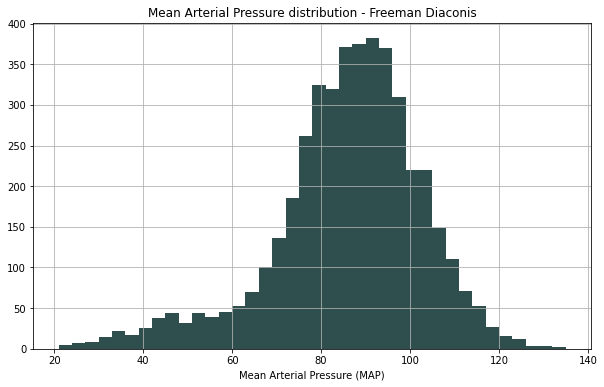

In [47]:
h = freeman_diaconis(df[df.mean_arterial_pressure != 0].mean_arterial_pressure)
print("Freeman Diaconis: ", h)
mn = int(df[df.mean_arterial_pressure != 0].mean_arterial_pressure.min())
mx = int(df[df.mean_arterial_pressure != 0].mean_arterial_pressure.max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df[df.mean_arterial_pressure != 0].mean_arterial_pressure,bins=bins, color="darkslategray")
axes.set_title("Mean Arterial Pressure distribution - Freeman Diaconis")
axes.set_xlabel("Mean Arterial Pressure (MAP)")

plt.grid()
plt.show()
plt.close()

Most patients had normal mean arterial pressure's, but we do see patients with MAP's lower than 70 mm Hg and greater than 100 mm Hg. When we perform pairwise exploration, we can hypothesize that patients with low MAP's and high MAP's were more likely to suffer from severe Covid-19 infection. 

<a id="b21"></a>
### D-Dimer

[Back to Contents](#Ind)

`D_dimer` is a numerical variable that indicates the D-dimer levels in a patient, which can be used to predict blood clotting risk, like pulmonary embolism. Normal D-dimer levels are any value under 0.5 ug/mL, which means this variable **can actually be zero**. Let's look at the descriptive statistics:

In [48]:
pd.DataFrame(df.D_dimer.describe())

,D_dimer
count,"4,711.0000"
mean,3.2225
std,5.2691
min,0.0000
25%,0.2800
50%,1.1800
75%,3.0600
max,20.0000


The mean D-dimer measurement was 3.22 ug/mL, meaning the average patient in our data set was at risk for blood clotting conditions. Since the value can be zero, we can go ahead and plot the histogram:

Freeman Diaconis:  1


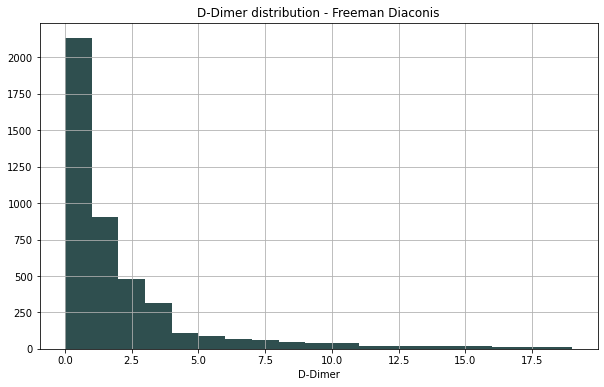

In [49]:
h = freeman_diaconis(df.D_dimer)
print("Freeman Diaconis: ", h)
mn = int(df.D_dimer.min())
mx = int(df.D_dimer.max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.D_dimer,bins=bins, color="darkslategray")
axes.set_title("D-Dimer distribution - Freeman Diaconis")
axes.set_xlabel("D-Dimer")

plt.grid()
plt.show()
plt.close()

The D-dimer distribution is very positively skewed, although it looks almost exponential. Based on our domain knowledge, this makes sense since we expect patients with Covid-19 to be at risk for blood clotting conditions. 

<a id="b22"></a>
### Platelets

[Back to Contents](#Ind)

`platelets` is a numerical variable that indicates the platelet count in a patients blood sample. The normal range is 150,000 to 450,000 platelets per microliter of blood, as stated during the domain knowledge section. A high platelet count can indicate an infection while a low platelet count can cause blood thinning and excessive bleeding. It is highly unlikely that a patient could have a platelet count of zero, since counts below 20,000 platelets/uL can cause sporadic internal bleeding and death. We can look at the descriptive statistics as follows:

In [50]:
pd.DataFrame(df.platelets.describe())

,platelets
count,"4,711.0000"
mean,226.3940
std,115.1348
min,0.0000
25%,158.0000
50%,212.0000
75%,279.0000
max,"1,226.0000"


The measurements in the data are in $10^9 / L$, but we will continue to refer to them as platelets/uL since its more interpretable. We seem to have missing values again, since the minimum is 0, and the mean of 226,394 platelets/uL is within the normal range. How many rows have missing values? Under 20,000 platelets/uL is usually considered very dangerous, but we will make that the minimum 10,000 platelets/uL, since this is considered the lowest possible platelet counts and is always fatal [[24]](https://www.mayoclinic.org/diseases-conditions/thrombocytopenia/symptoms-causes/syc-20378293). To match the units used in the data, this is equivalent to 10 * $10^9 / L$

In [51]:
df[df.platelets <= 10]

,length_of_stay,age,death,severity,black,white,asian,latino,myocardial_infarction,peripheral_vascular_disease,...,alanine_aminotransferase,white_blood_cell,lymphocytes,interleukin6,ferritin,C_reactive_protein,procalcitonin,troponin,race,temp_F
42,5,62,0,3,0,1,0,0,0,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,white,99.1000
73,10,30,0,2,0,0,0,0,1,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,101.1000
81,9,63,0,4,1,0,0,0,0,0,...,22.0000,0.0000,0.0000,0.0000,0.0000,16.4000,0.0000,0.0000,black,32.0000
141,9,66,0,2,1,0,0,0,0,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,32.0000
189,9,50,0,1,0,1,0,1,0,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,white,-0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,2,67,0,3,1,0,0,0,0,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,97.4000
4687,1,34,0,2,1,0,0,0,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,98.3000
4688,0,76,0,4,1,0,0,0,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,98.2000
4691,8,77,0,4,0,0,1,0,0,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,asian,98.0000


189 patients are missing platelet counts. Once again, lets compare this to missing values for other variables to see if its the same patients. We can start with patients that are missing oxygen saturation, MAP, temp, and platelet data:

In [52]:
df[(df.oxygen_saturation == 0) & (df.mean_arterial_pressure == 0) & ((df.temp_F <= 95) | (df.temp_F >= 108)) & (df.platelets <= 10)]

,length_of_stay,age,death,severity,black,white,asian,latino,myocardial_infarction,peripheral_vascular_disease,...,alanine_aminotransferase,white_blood_cell,lymphocytes,interleukin6,ferritin,C_reactive_protein,procalcitonin,troponin,race,temp_F
81,9,63,0,4,1,0,0,0,0,0,...,22.0000,0.0000,0.0000,0.0000,0.0000,16.4000,0.0000,0.0000,black,32.0000
141,9,66,0,2,1,0,0,0,0,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,32.0000
299,1,55,0,1,0,1,0,0,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,white,32.0000
376,3,57,0,2,0,0,1,0,0,0,...,0.0000,0.0000,0.0000,60.1000,641.0000,19.3000,0.0000,0.0100,asian,32.0000
454,0,53,0,2,0,0,0,1,0,1,...,74.0000,5.1000,1.1000,"43,928.5458",192.0000,3.8000,0.0000,0.0100,latino,32.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4331,6,72,1,5,0,0,0,0,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,32.0000
4420,6,87,0,6,1,0,0,0,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,32.0000
4486,4,44,0,3,0,0,0,1,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,latino,32.0000
4565,1,76,1,5,0,0,0,1,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,latino,32.0000


74 patients are missing all four measurements, which is significant. How many patients are missing any of these variables?

In [53]:
df[(df.oxygen_saturation == 0) | (df.mean_arterial_pressure == 0) | ((df.temp_F <= 95) | (df.temp_F >= 108)) | (df.platelets <= 10)]

,length_of_stay,age,death,severity,black,white,asian,latino,myocardial_infarction,peripheral_vascular_disease,...,alanine_aminotransferase,white_blood_cell,lymphocytes,interleukin6,ferritin,C_reactive_protein,procalcitonin,troponin,race,temp_F
42,5,62,0,3,0,1,0,0,0,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,white,99.1000
72,3,58,0,1,1,0,0,0,0,0,...,34.0000,5.7000,1.2000,4.8000,30.0000,0.8000,0.1000,0.0200,black,32.0000
73,10,30,0,2,0,0,0,0,1,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,101.1000
79,4,60,0,1,0,0,0,0,0,1,...,0.0000,3.5000,1.1000,0.0000,299.0000,0.0000,0.0000,0.0000,black,-0.0000
81,9,63,0,4,1,0,0,0,0,0,...,22.0000,0.0000,0.0000,0.0000,0.0000,16.4000,0.0000,0.0000,black,32.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4687,1,34,0,2,1,0,0,0,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,98.3000
4688,0,76,0,4,1,0,0,0,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,98.2000
4691,8,77,0,4,0,0,1,0,0,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,asian,98.0000
4706,4,74,0,4,0,0,1,0,0,0,...,24.0000,10.3000,1.0000,0.0000,295.0000,1.8000,0.0999,0.0100,asian,32.0000


389 patients are missing at least one of these variables. This will be important to keep in mind before we decide to drop any rows or impute any missing values before modeling. For now, let's look at the descriptive statistics and the distribution of platelet counts *without* the missing measurements:

In [54]:
pd.DataFrame(df[df.platelets >= 10].platelets.describe())

,platelets
count,"4,522.0000"
mean,235.8487
std,107.6171
min,13.0000
25%,165.0000
50%,216.0000
75%,282.0000
max,"1,226.0000"


Without the missing values, the mean platelet count is 235,849 platelets/uL, which is still within the normal range. The mean is greater than the median, which is 216,000 platelets/uL, which hints at a positively skewed distribution. Let's look at the histogram:

Freeman Diaconis:  15


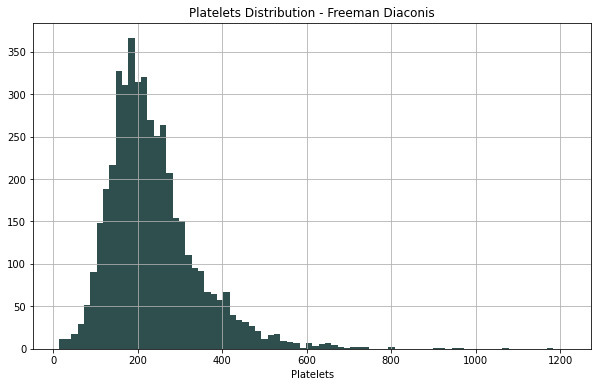

In [55]:
h = freeman_diaconis(df[df.platelets >= 10].platelets)
print("Freeman Diaconis: ", h)
mn = int(df[df.platelets >= 10].platelets.min())
mx = int(df[df.platelets >= 10].platelets.max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df[df.platelets >= 10].platelets,bins=bins, color="darkslategray")
axes.set_title("Platelets Distribution - Freeman Diaconis")
axes.set_xlabel("Platelets")

plt.grid()
plt.show()
plt.close()

The distribution is slightly right skewed, although the very high platelet counts have very low densities. 

<a id="b23"></a>
### International Normalized Ratio (INR)

[Back to Contents](#Ind)

`international_normalized_ratio` is a numerical variable that indicates blood clot or heart condition risk. The normal range for the ratio is 1.1 or below, where greater than 2.0 is a blood clot or atrial fibrillation risk. INR **can be zero**, so these values would not be considered missing values. 

In [56]:
pd.DataFrame(df.international_normalized_ratio.describe())

,international_normalized_ratio
count,"4,711.0000"
mean,1.1050
std,0.9976
min,0.0000
25%,1.0000
50%,1.1000
75%,1.2000
max,17.0001


The mean INR is about 1.11, so its right on the threshold for a "normal" ratio. I expect most values to sit around 1.1 or lower, with several much higher values in at risk patients. Let's plot a histogram of the ratios:

Freeman Diaconis:  1


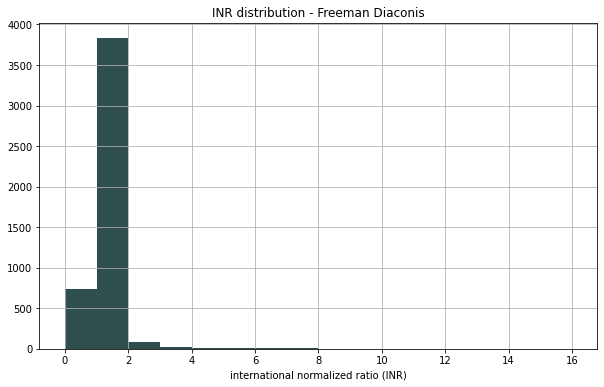

In [57]:
h = freeman_diaconis(df.international_normalized_ratio)
print("Freeman Diaconis: ", h)
mn = int(df.international_normalized_ratio.min())
mx = int(df.international_normalized_ratio.max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.international_normalized_ratio,bins=bins, color="darkslategray")
axes.set_title("INR distribution - Freeman Diaconis")
axes.set_xlabel("international normalized ratio (INR)")

plt.grid()
plt.show()
plt.close()

As expected, most INR's are around 1.1, but we see a few higher values. We can hypothesize that higher INR's are associated with patients who had more severe Covid-19 infection.

<a id="b24"></a>
### Blood Urea Nitrogen

[Back to Contents](#Ind)

`blood_urea_nitrogen` is a numerical variable used to detect kidney dysfunction. The normal range is 6 to 24 mg/dL (2.1 to 8.5 mmol/L), where higher BUN levels indicate issues with the kidneys. The BUN level cannot be zero, so zero values will be treated like missing values. Since we know this data set has missing values for blood panel results, let's check for that, first:

In [58]:
df[df.blood_urea_nitrogen == 0]

,length_of_stay,age,death,severity,black,white,asian,latino,myocardial_infarction,peripheral_vascular_disease,...,alanine_aminotransferase,white_blood_cell,lymphocytes,interleukin6,ferritin,C_reactive_protein,procalcitonin,troponin,race,temp_F
3,15,72,0,9,1,0,0,0,1,0,...,17.0000,3.7000,0.5000,0.0000,816.0000,18.4000,7.3000,0.0500,black,102.0000
4,9,71,0,7,1,0,0,0,0,0,...,28.0000,5.7000,1.4000,39.4000,"1,691.0000",11.6000,0.0000,0.0100,black,100.5000
7,3,66,0,3,0,1,0,0,0,0,...,18.0000,5.8000,0.8000,57.5000,992.0000,1.5000,0.3000,0.0100,white,98.5000
26,15,73,1,6,0,1,0,0,0,0,...,44.0000,22.8000,0.9000,36.0000,466.0000,20.5000,0.3000,0.0800,white,98.0000
28,17,35,0,1,1,0,0,0,0,0,...,37.0000,4.4000,0.9000,0.0000,"3,852.0000",2.7000,0.1000,0.0100,black,98.2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,2,67,0,3,1,0,0,0,0,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,97.4000
4687,1,34,0,2,1,0,0,0,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,98.3000
4688,0,76,0,4,1,0,0,0,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,98.2000
4691,8,77,0,4,0,0,1,0,0,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,asian,98.0000


There are 605 missing values. We will need to consider if any other variables contain similar information to avoid dropping too many patients or avoid missing value imputation that results in overfitting. For now, let's look at the descriptive statistics *without the missing values*: 

In [59]:
pd.DataFrame(df[df.blood_urea_nitrogen != 0].blood_urea_nitrogen.describe())

,blood_urea_nitrogen
count,"4,106.0000"
mean,31.2038
std,31.5113
min,4.9990
25%,12.0000
50%,19.0000
75%,38.0000
max,301.0000


The mean BUN level is 31.20 mg/dL, which is above the normal range. This means most patients, excluding patients who were missing this measurement, had possible kidney dysfunction during their hospital stay. In addition, the mean is greater than the median, which is 19.00 mg/dL, so we can expect a positively skewed distribution.

Freeman Diaconis:  4


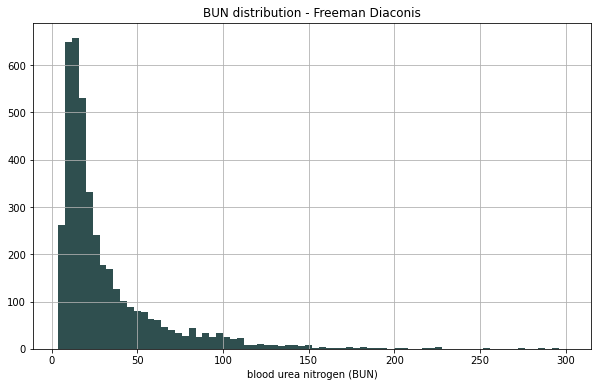

In [60]:
h = freeman_diaconis(df[df.blood_urea_nitrogen != 0].blood_urea_nitrogen)
print("Freeman Diaconis: ", h)
mn = int(df[df.blood_urea_nitrogen != 0].blood_urea_nitrogen.min())
mx = int(df[df.blood_urea_nitrogen != 0].blood_urea_nitrogen.max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df[df.blood_urea_nitrogen != 0].blood_urea_nitrogen,bins=bins, color="darkslategray")
axes.set_title("BUN distribution - Freeman Diaconis")
axes.set_xlabel("blood urea nitrogen (BUN)")

plt.grid()
plt.show()
plt.close()

As expected, we have a right skewed distribution. Once again, we may not choose to use this variable due to all the missing values if another variable with similar information is cleaner.

<a id="b25"></a>
### Creatinine

[Back to Contents](#Ind)

`creatinine` is a numerical variable that is used to determine kidney dysfunction. A healthy individual filters creatinine out of their blood through the kidney's. However, in the case of kidney dysfunction, the kidneys are unable to efficiently filter which results in high creatinine levels in the blood. Due to patient de-identification, we do not have the sex of the patients, which affects the normal ranges of creatinine, slightly. On average, however, we can use the range of 0.6 to 1.3 mg/dL (61.9 to 114.9 µmol/L) as a normal creatine level for any patient. Low creatinine levels can be due to low muscle density or a liver condition. 

To start, let's look for any missing values:

In [61]:
df[df.creatinine == 0]

,length_of_stay,age,death,severity,black,white,asian,latino,myocardial_infarction,peripheral_vascular_disease,...,alanine_aminotransferase,white_blood_cell,lymphocytes,interleukin6,ferritin,C_reactive_protein,procalcitonin,troponin,race,temp_F
42,5,62,0,3,0,1,0,0,0,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,white,99.1000
73,10,30,0,2,0,0,0,0,1,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,101.1000
81,9,63,0,4,1,0,0,0,0,0,...,22.0000,0.0000,0.0000,0.0000,0.0000,16.4000,0.0000,0.0000,black,32.0000
110,3,26,0,0,1,0,0,0,0,0,...,19.0000,7.1000,0.5000,0.0000,0.0000,0.0000,0.0999,0.0000,black,32.0000
141,9,66,0,2,1,0,0,0,0,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,32.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,2,67,0,3,1,0,0,0,0,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,97.4000
4687,1,34,0,2,1,0,0,0,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,98.3000
4688,0,76,0,4,1,0,0,0,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,98.2000
4691,8,77,0,4,0,0,1,0,0,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,asian,98.0000


There are 190 missing values, which is less than the BUN variable had. In adddition, creatinine is considered a better indicator of kidney function than BUN levels [[25]](https://www.scsp.net/articles/why-are-bun-and-creatinine-important-to-monitor-in-kidney-patients/). How many missing values for creatinine overlap with patients who had other missing values?

In [62]:
df[(df.oxygen_saturation == 0) & (df.mean_arterial_pressure == 0) & ((df.temp_F <= 95) | (df.temp_F >= 108)) & (df.platelets <= 10) & (df.creatinine == 0)]

,length_of_stay,age,death,severity,black,white,asian,latino,myocardial_infarction,peripheral_vascular_disease,...,alanine_aminotransferase,white_blood_cell,lymphocytes,interleukin6,ferritin,C_reactive_protein,procalcitonin,troponin,race,temp_F
81,9,63,0,4,1,0,0,0,0,0,...,22.0000,0.0000,0.0000,0.0000,0.0000,16.4000,0.0000,0.0000,black,32.0000
141,9,66,0,2,1,0,0,0,0,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,32.0000
299,1,55,0,1,0,1,0,0,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,white,32.0000
376,3,57,0,2,0,0,1,0,0,0,...,0.0000,0.0000,0.0000,60.1000,641.0000,19.3000,0.0000,0.0100,asian,32.0000
521,6,56,0,1,1,0,0,0,0,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,32.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4331,6,72,1,5,0,0,0,0,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,32.0000
4420,6,87,0,6,1,0,0,0,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,32.0000
4486,4,44,0,3,0,0,0,1,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,latino,32.0000
4565,1,76,1,5,0,0,0,1,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,latino,32.0000


There are 69 values that are missing all four variables. This will be helpful to keep in mind when we decide what rows we may need to drop and what missing values we need to impute. Let's look at the descriptive statistics for the all patients with non-zero creatinine levels:

In [63]:
pd.DataFrame(df[df.creatinine != 0].creatinine.describe())

,creatinine
count,"4,521.0000"
mean,2.0293
std,2.6617
min,0.2000
25%,0.8000
50%,1.1000
75%,1.8800
max,31.6600


The mean creatinine level, excluding missing value patients, is 2.03 mg/dL, which is a bit higher than the normal range. Since the mean is greater than the median, which is 1.10 mg/dL, we can expect a positively skewed distribution.

Freeman Diaconis:  1


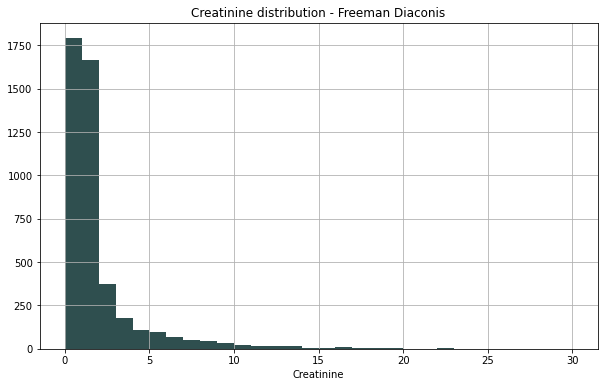

In [64]:
h = freeman_diaconis(df[df.creatinine != 0].creatinine)
print("Freeman Diaconis: ", h)
mn = int(df[df.creatinine != 0].creatinine.min())
mx = int(df[df.creatinine != 0].creatinine.max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df[df.creatinine != 0].creatinine,bins=bins, color="darkslategray")
axes.set_title("Creatinine distribution - Freeman Diaconis")
axes.set_xlabel("Creatinine")

plt.grid()
plt.show()
plt.close()

As expected, the distribution of creatinine is right skewed. As stated earlier, we will opt to use this variable instead of BUN, since creatinine is more informative and we have much fewer missing values. 

<a id="b26"></a>
### Sodium

[Back to Contents](#Ind)

`sodium` is a numerical variable that indicates a patients blood sodium level. The normal range is typically between 135 and 145 milliequivalents per liter (mEq/L). A low sodium level usually indicates organ issues, such as kidney or heart failure and cirrhosis. A high sodium level typically indicates dehydration or kidney dysfunction. Let's check for missing values, since 0 is not possible.

In [65]:
df[df.sodium == 0]

,length_of_stay,age,death,severity,black,white,asian,latino,myocardial_infarction,peripheral_vascular_disease,...,alanine_aminotransferase,white_blood_cell,lymphocytes,interleukin6,ferritin,C_reactive_protein,procalcitonin,troponin,race,temp_F
42,5,62,0,3,0,1,0,0,0,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,white,99.1000
73,10,30,0,2,0,0,0,0,1,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,101.1000
81,9,63,0,4,1,0,0,0,0,0,...,22.0000,0.0000,0.0000,0.0000,0.0000,16.4000,0.0000,0.0000,black,32.0000
110,3,26,0,0,1,0,0,0,0,0,...,19.0000,7.1000,0.5000,0.0000,0.0000,0.0000,0.0999,0.0000,black,32.0000
129,34,68,0,4,1,0,0,0,0,1,...,9.9990,8.5000,0.7000,0.0000,602.0000,11.4000,0.2000,0.0100,black,98.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,2,67,0,3,1,0,0,0,0,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,97.4000
4687,1,34,0,2,1,0,0,0,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,98.3000
4688,0,76,0,4,1,0,0,0,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,98.2000
4691,8,77,0,4,0,0,1,0,0,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,asian,98.0000


There are 236 missing values. Let's look at descriptive statistics for non zero sodium levels:

In [66]:
pd.DataFrame(df[df.sodium != 0].sodium.describe())

,sodium
count,"4,475.0000"
mean,138.1303
std,7.5319
min,105.0000
25%,134.0000
50%,137.0000
75%,141.0000
max,170.0010


The mean sodium level is 138.13 mEq/L, which is within the normal range. The minimum and maximum sodium levels make sense, based on domain knowledge. The mean is only slightly higher than the median, which is 137 mEq/L, so the distribution may not be skewed.

Freeman Diaconis:  1


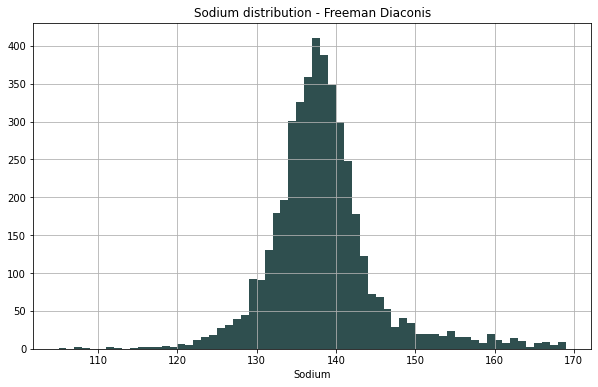

In [67]:
h = freeman_diaconis(df[df.sodium != 0].sodium)
print("Freeman Diaconis: ", h)
mn = int(df[df.sodium != 0].sodium.min())
mx = int(df[df.sodium != 0].sodium.max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df[df.sodium != 0].sodium,bins=bins, color="darkslategray")
axes.set_title("Sodium distribution - Freeman Diaconis")
axes.set_xlabel("Sodium")

plt.grid()
plt.show()
plt.close()

As expected, sodium appears to follow an approximate normal distribution. Based on domain knowledge, this makes sense since low and high sodium levels can indicate different problems. Therefore, sodium may be a candidate for an interaction term if we determine that the correlation with our target variable is significant. 

<a id="b27"></a>
### Glucose

[Back to Contents](#Ind)

`glucose` is a numerical variable that indicates the blood glucose level in each patient. Normal glucose levels are less than 140 mg/dL (7.8 mmol/L), 140-200 mg/dL indicates pre-diabetes, and over 200 mg/dL indicates diabetes. Let's check for any missing/zero values, which are not possible based on domain knowledge:

In [68]:
df[df.glucose == 0]

,length_of_stay,age,death,severity,black,white,asian,latino,myocardial_infarction,peripheral_vascular_disease,...,alanine_aminotransferase,white_blood_cell,lymphocytes,interleukin6,ferritin,C_reactive_protein,procalcitonin,troponin,race,temp_F
3,15,72,0,9,1,0,0,0,1,0,...,17.0000,3.7000,0.5000,0.0000,816.0000,18.4000,7.3000,0.0500,black,102.0000
4,9,71,0,7,1,0,0,0,0,0,...,28.0000,5.7000,1.4000,39.4000,"1,691.0000",11.6000,0.0000,0.0100,black,100.5000
7,3,66,0,3,0,1,0,0,0,0,...,18.0000,5.8000,0.8000,57.5000,992.0000,1.5000,0.3000,0.0100,white,98.5000
8,9,66,0,5,0,1,0,1,0,0,...,30.0000,5.6000,0.6000,0.0000,"8,276.0000",8.3000,0.0000,0.1900,white,101.1000
14,7,97,0,3,0,0,0,1,0,0,...,12.0000,4.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0100,latino,99.7000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4691,8,77,0,4,0,0,1,0,0,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,asian,98.0000
4692,0,50,0,1,0,0,0,0,0,1,...,31.0000,5.6000,0.9000,3.9999,76.0000,8.5000,0.1000,0.0100,black,98.7000
4695,0,58,0,0,0,0,0,1,0,1,...,12.0000,12.9000,2.3000,0.0000,0.0000,0.0000,0.0000,0.0000,latino,99.6000
4707,2,66,0,2,0,0,0,1,0,1,...,30.0000,4.1000,1.2000,0.0000,"1,165.0000",3.1000,0.0999,0.0100,latino,98.6000


A huge proportion of patients are missing glucose data. Therefore, we do not need to move forward with looking at this variable since we already have a categorical variable that indicates if a patient has diabetes and the results from looking at this variable will not be representative of the patients in our data set. 

<a id="b28"></a>
### Aspartate Aminotransferase

[Back to Contents](#Ind)

We have two variables, AST and ALT, which are used to detect liver disease. We may look at both and choose one to move forward with, since we want to avoid multicollinearity, or opt to use both and transform a new variable for the AST/ALT ratio which is used to diagnose liver conditions. `aspartate_aminotransferase` is a numerical variable that is used to predict liver disease, although AST can become elevated from heart and lung conditions. The normal range for AST is 8 to 33 U/L. Let's check for missing/abnormal values:

In [69]:
df[(df.aspartate_aminotransferase == 0)]

,length_of_stay,age,death,severity,black,white,asian,latino,myocardial_infarction,peripheral_vascular_disease,...,alanine_aminotransferase,white_blood_cell,lymphocytes,interleukin6,ferritin,C_reactive_protein,procalcitonin,troponin,race,temp_F
6,4,71,0,2,1,0,0,0,0,0,...,0.0000,5.4000,1.2000,0.0000,0.0000,7.3000,0.0000,0.0000,black,98.7000
42,5,62,0,3,0,1,0,0,0,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,white,99.1000
46,4,58,0,3,1,0,0,0,0,0,...,0.0000,5.6000,0.4000,0.0000,0.0000,0.0000,8.0000,0.0000,black,100.5000
73,10,30,0,2,0,0,0,0,1,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,101.1000
79,4,60,0,1,0,0,0,0,0,1,...,0.0000,3.5000,1.1000,0.0000,299.0000,0.0000,0.0000,0.0000,black,-0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,2,67,0,3,1,0,0,0,0,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,97.4000
4687,1,34,0,2,1,0,0,0,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,98.3000
4688,0,76,0,4,1,0,0,0,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,98.2000
4691,8,77,0,4,0,0,1,0,0,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,asian,98.0000


There are 305 missing values, which may overlap with missing values for other variables. 

In [70]:
pd.DataFrame(df[(df.aspartate_aminotransferase != 0)].aspartate_aminotransferase.describe())

,aspartate_aminotransferase
count,"4,406.0000"
mean,67.5834
std,210.7560
min,13.0000
25%,27.0000
50%,40.0000
75%,65.0000
max,"10,000.0010"


The mean AST level is 67.68 U/L, which is pretty elevated. The mean is greater than the median, which is 40.00 U/L, hinting at a positively skewed distribution. In addition, we have values as large as 10,000 U/L, which is possible although rare, which may make the distribution difficult to visualize. We can attempt to plot the histogram:

Freeman Diaconis:  5


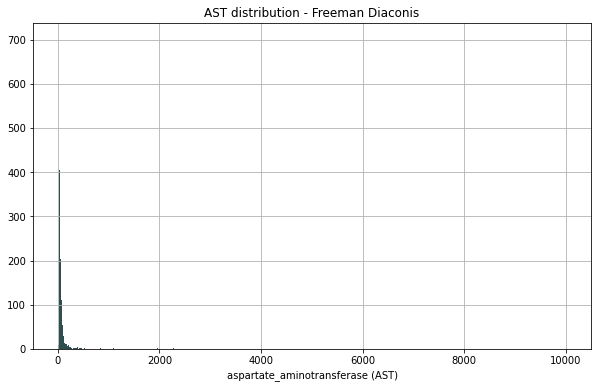

In [71]:
h = freeman_diaconis(df[df.aspartate_aminotransferase != 0].aspartate_aminotransferase)
print("Freeman Diaconis: ", h)
mn = int(df[df.aspartate_aminotransferase != 0].aspartate_aminotransferase.min())
mx = int(df[df.aspartate_aminotransferase != 0].aspartate_aminotransferase.max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df[df.aspartate_aminotransferase != 0].aspartate_aminotransferase,bins=bins, color="darkslategray")
axes.set_title("AST distribution - Freeman Diaconis")
axes.set_xlabel("aspartate_aminotransferase (AST)")

plt.grid()
plt.show()
plt.close()

As expected, the histram is difficult to plot. We can try removing some of the very large values, which is most values in the thousands range, to visualize the AST levels for a majority of patients:

Freeman Diaconis:  5


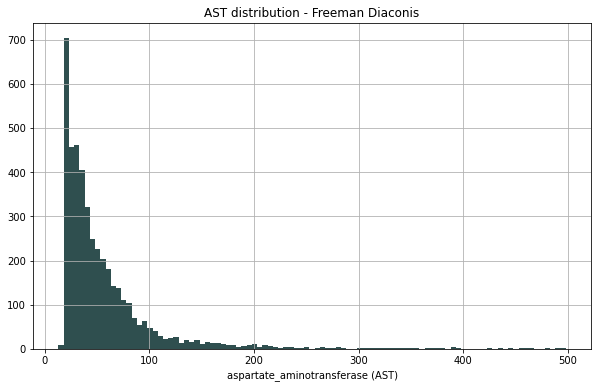

In [72]:
h = freeman_diaconis(df[(df.aspartate_aminotransferase != 0) & (df.aspartate_aminotransferase <= 500)].aspartate_aminotransferase)
print("Freeman Diaconis: ", h)
mn = int(df[(df.aspartate_aminotransferase != 0) & (df.aspartate_aminotransferase <= 500)].aspartate_aminotransferase.min())
mx = int(df[(df.aspartate_aminotransferase != 0) & (df.aspartate_aminotransferase <= 500)].aspartate_aminotransferase.max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df[(df.aspartate_aminotransferase != 0) & (df.aspartate_aminotransferase <= 500)].aspartate_aminotransferase, bins=bins, color="darkslategray")
axes.set_title("AST distribution - Freeman Diaconis")
axes.set_xlabel("aspartate_aminotransferase (AST)")

plt.grid()
plt.show()
plt.close()

The right skewed distribution is a more apparent when we "zoom" in, which follows what we expected. We should keep in mind that AST can become elevated due to dysfunction in other organs, so the variable is a bit ambiguous compared to ALT. 

<a id="b29"></a>
### Alanine Aminotransferase

[Back to Contents](#Ind)

The second variable used to detect liver disease is `alanine_aminotransferase`, or ALT, which is a numeric variable. ALT is considered more "specific" since it is indicative of liver conditions **only** and more accurately.  The normal range for ALT is 4 to 36 U/L, where higher values indicate a liver condition. Let's check for missing values:

In [73]:
df[df.alanine_aminotransferase == 0]

,length_of_stay,age,death,severity,black,white,asian,latino,myocardial_infarction,peripheral_vascular_disease,...,alanine_aminotransferase,white_blood_cell,lymphocytes,interleukin6,ferritin,C_reactive_protein,procalcitonin,troponin,race,temp_F
6,4,71,0,2,1,0,0,0,0,0,...,0.0000,5.4000,1.2000,0.0000,0.0000,7.3000,0.0000,0.0000,black,98.7000
42,5,62,0,3,0,1,0,0,0,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,white,99.1000
46,4,58,0,3,1,0,0,0,0,0,...,0.0000,5.6000,0.4000,0.0000,0.0000,0.0000,8.0000,0.0000,black,100.5000
73,10,30,0,2,0,0,0,0,1,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,101.1000
79,4,60,0,1,0,0,0,0,0,1,...,0.0000,3.5000,1.1000,0.0000,299.0000,0.0000,0.0000,0.0000,black,-0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,2,67,0,3,1,0,0,0,0,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,97.4000
4687,1,34,0,2,1,0,0,0,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,98.3000
4688,0,76,0,4,1,0,0,0,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,98.2000
4691,8,77,0,4,0,0,1,0,0,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,asian,98.0000


There are 256 missing values. I suspect that about 300 patients are missing most of the blood panel results, so I am leaning towards dropping the rows when we continue to modeling. Let's look at the descriptive statistics for the non-zero ALT levels:

In [74]:
pd.DataFrame(df[df.alanine_aminotransferase != 0].alanine_aminotransferase.describe())

,alanine_aminotransferase
count,"4,455.0000"
mean,45.3090
std,111.5789
min,6.0000
25%,17.0000
50%,27.0000
75%,45.0000
max,"3,228.0000"


The range of ALT values is "tighter" than AST, which is expected since we noted that AST is more ambigious than ALT, where ALT is specific to the liver. The mean ALT level is 45.31 U/L, which is elevated compared to the normal range. The mean is greater than the median, which is 27.00 U/L, so I would a positively skewed distribution. Let's do the same for ALT as we did for AST and look at two histograms, one with the large values and one without:

Freeman Diaconis:  4


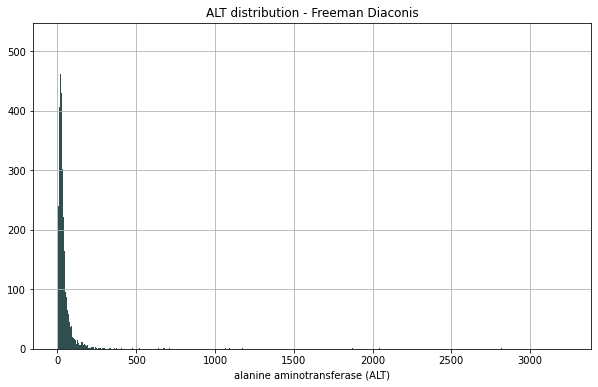

In [75]:
h = freeman_diaconis(df[df.alanine_aminotransferase != 0].alanine_aminotransferase)
print("Freeman Diaconis: ", h)
mn = int(df[df.alanine_aminotransferase != 0].alanine_aminotransferase.min())
mx = int(df[df.alanine_aminotransferase != 0].alanine_aminotransferase.max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df[df.alanine_aminotransferase != 0].alanine_aminotransferase,bins=bins, color="darkslategray")
axes.set_title("ALT distribution - Freeman Diaconis")
axes.set_xlabel("alanine aminotransferase (ALT)")

plt.grid()
plt.show()
plt.close()

Freeman Diaconis:  4


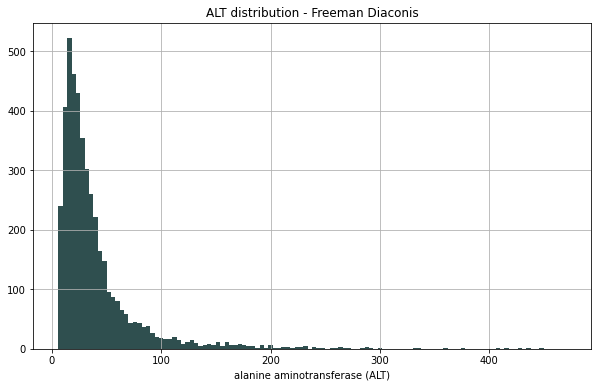

In [76]:
h = freeman_diaconis(df[(df.alanine_aminotransferase != 0) & (df.alanine_aminotransferase <=500)].alanine_aminotransferase)
print("Freeman Diaconis: ", h)
mn = int(df[(df.alanine_aminotransferase != 0) & (df.alanine_aminotransferase <=500)].alanine_aminotransferase.min())
mx = int(df[(df.alanine_aminotransferase != 0) & (df.alanine_aminotransferase <=500)].alanine_aminotransferase.max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df[(df.alanine_aminotransferase != 0) & (df.alanine_aminotransferase <=500)].alanine_aminotransferase,bins=bins, color="darkslategray")
axes.set_title("ALT distribution - Freeman Diaconis")
axes.set_xlabel("alanine aminotransferase (ALT)")

plt.grid()
plt.show()
plt.close()

As expected, ALT follows a right skewed distribution. Once again, I suspect that many of the missing values overlap for patients, so we will need to drop rows when the time comes. Otherwise, we can plan to use both ALT and AST, especially since transformations exist that make the variables more interpretable.

<a id="b30"></a>
### White Blood Cells

[Back to Contents](#Ind)

`white_blood_cell` is a numerical variable that indicates the WBC count for each patient. The normal WBC range is anywhere from 4,500 to 11,000 WBCs per microliter (4.5 to 11.0 × $10^9/L$), where higher WBC counts can indicate an active infection and lower WBC may indicate vitamin deficiencies, Lupus, rheumatoid arthritis, or side effects from cancer treatment. WBC counts cannot be zero, so let's check for missing values:

In [77]:
df[df.white_blood_cell == 0]

,length_of_stay,age,death,severity,black,white,asian,latino,myocardial_infarction,peripheral_vascular_disease,...,alanine_aminotransferase,white_blood_cell,lymphocytes,interleukin6,ferritin,C_reactive_protein,procalcitonin,troponin,race,temp_F
42,5,62,0,3,0,1,0,0,0,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,white,99.1000
73,10,30,0,2,0,0,0,0,1,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,101.1000
81,9,63,0,4,1,0,0,0,0,0,...,22.0000,0.0000,0.0000,0.0000,0.0000,16.4000,0.0000,0.0000,black,32.0000
141,9,66,0,2,1,0,0,0,0,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,32.0000
189,9,50,0,1,0,1,0,1,0,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,white,-0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,2,67,0,3,1,0,0,0,0,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,97.4000
4687,1,34,0,2,1,0,0,0,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,98.3000
4688,0,76,0,4,1,0,0,0,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,98.2000
4691,8,77,0,4,0,0,1,0,0,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,asian,98.0000


There are 179 missing values, which seem to overlap with a lot of the other variables with missing values in the data set. For now, let's look at the descriptive statistics for the non zero WBC counts:

In [78]:
pd.DataFrame(df[df.white_blood_cell != 0].white_blood_cell.describe())

,white_blood_cell
count,"4,532.0000"
mean,8.8062
std,7.3011
min,0.2000
25%,5.6000
50%,7.5000
75%,10.4000
max,219.7000


The mean WBC count is 8.81 × $10^9/L$, or 8,810 WBC's per uL. Based on the median, of 7.5 × $10^9/L$, and the large range of counts from 0.2 × $10^9/L$ to 219.70 × $10^9/L$, we can expect a positively skewed distribution.

Freeman Diaconis:  1


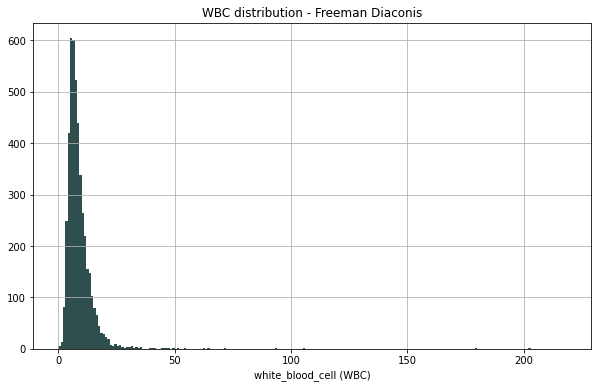

In [79]:
h = freeman_diaconis(df[df.white_blood_cell != 0].white_blood_cell)
print("Freeman Diaconis: ", h)
mn = int(df[df.white_blood_cell != 0].white_blood_cell.min())
mx = int(df[df.white_blood_cell != 0].white_blood_cell.max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df[df.white_blood_cell != 0].white_blood_cell,bins=bins, color="darkslategray")
axes.set_title("WBC distribution - Freeman Diaconis")
axes.set_xlabel("white_blood_cell (WBC)")

plt.grid()
plt.show()
plt.close()

As expected, WBC counts follow a right skewed distribution. We can hypothesize that very high values are associated with severe infection or organ dysfunction. 

<a id="b31"></a>
### Lymphocytes

[Back to Contents](#Ind)

`lymphocytes` is a numerical variable that indicates the lymphocyte counts for each patient. This variable is very similar to WBC counts since lymphocytes are a sub-group of WBC's that make up about 20-40% of WBC's, which is about 1,000 and 4,800 lymphocytes per microliter of blood. The other two types of white blood cells are granulocytes and monocytes, although lymphocytes is usually preferred since T-cells and B-cells make up our lymphocytes and are very indicative of active infections. This value cannot be zero, like WBC counts, so let's check for zero values:

In [80]:
df[df.lymphocytes == 0]

,length_of_stay,age,death,severity,black,white,asian,latino,myocardial_infarction,peripheral_vascular_disease,...,alanine_aminotransferase,white_blood_cell,lymphocytes,interleukin6,ferritin,C_reactive_protein,procalcitonin,troponin,race,temp_F
42,5,62,0,3,0,1,0,0,0,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,white,99.1000
73,10,30,0,2,0,0,0,0,1,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,101.1000
81,9,63,0,4,1,0,0,0,0,0,...,22.0000,0.0000,0.0000,0.0000,0.0000,16.4000,0.0000,0.0000,black,32.0000
141,9,66,0,2,1,0,0,0,0,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,32.0000
189,9,50,0,1,0,1,0,1,0,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,white,-0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,2,67,0,3,1,0,0,0,0,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,97.4000
4687,1,34,0,2,1,0,0,0,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,98.3000
4688,0,76,0,4,1,0,0,0,0,0,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,98.2000
4691,8,77,0,4,0,0,1,0,0,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,asian,98.0000


The same number of patients who have missing WBC counts also have missing lymphocyte counts, which makes sense since they are detected with the same test. We can look at the descriptive statistics for the non-zero values:

In [81]:
pd.DataFrame(df[df.lymphocytes != 0].lymphocytes.describe())

,lymphocytes
count,"4,532.0000"
mean,1.3604
std,4.9511
min,0.1000
25%,0.7000
50%,1.0000
75%,1.4000
max,209.1000


The mean lymphocyte count is 1.36 × $10^9/L$, which is about 25% of the mean WBC count. Therefore, the results seem to align with our domian knowledge. Both the WBC and lymphocyte counts are within the normal range. Based on the fact that median of 1.00 × $10^9/L$ is less than the mean and the range of values is very dispersed, we expect a right skewed distribution:

Freeman Diaconis:  1


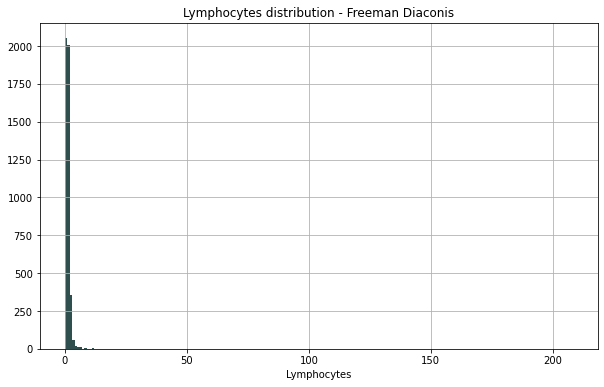

In [82]:
h = freeman_diaconis(df[df.lymphocytes != 0].lymphocytes)
print("Freeman Diaconis: ", h)
mn = int(df[df.lymphocytes != 0].lymphocytes.min())
mx = int(df[df.lymphocytes != 0].lymphocytes.max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df[df.lymphocytes != 0].lymphocytes,bins=bins, color="darkslategray")
axes.set_title("Lymphocytes distribution - Freeman Diaconis")
axes.set_xlabel("Lymphocytes")

plt.grid()
plt.show()
plt.close()

We have a very skewed distribution due to the large lymphocyte counts, but we can see that the distribution is positively skewed. To confirm, we can look at the lower end of the distribution:

Freeman Diaconis:  1


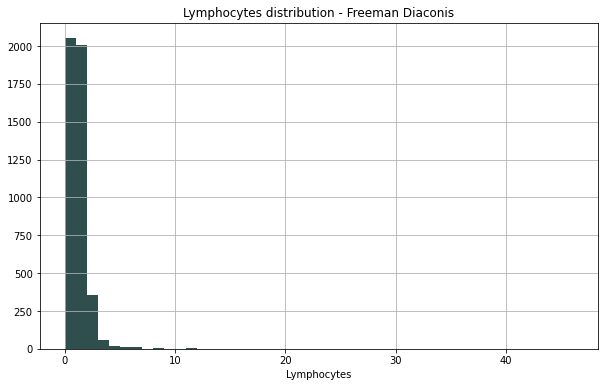

In [83]:
h = freeman_diaconis(df[(df.lymphocytes != 0) & (df.lymphocytes <= 50)].lymphocytes)
print("Freeman Diaconis: ", h)
mn = int(df[(df.lymphocytes != 0) & (df.lymphocytes <= 50)].lymphocytes.min())
mx = int(df[(df.lymphocytes != 0) & (df.lymphocytes <= 50)].lymphocytes.max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df[(df.lymphocytes != 0) & (df.lymphocytes <= 50)].lymphocytes,bins=bins, color="darkslategray")
axes.set_title("Lymphocytes distribution - Freeman Diaconis")
axes.set_xlabel("Lymphocytes")

plt.grid()
plt.show()
plt.close()

As stated, we are dealing with a very positive skewed distribution which is a bit difficult to plot because of the extreme values. We can expect these high lymphocyte counts to correlate with severe Covid-19 infection. 

<a id="b32"></a>
### Interleukin6

[Back to Contents](#Ind)

`interleukin6` is a numerical variable that indicates the IL-6 level in the patients blood while at the hospital. The normal range is between 0 and 43.5 pg/ml, although its usually around 5.186 pg/ml. A high IL-6 may indicate an active inflammatory condition, an increased risk of mortality, and an increased risk for ventilation requirements.        

In [84]:
pd.DataFrame(df.interleukin6.describe())

,interleukin6
count,"4,711.0000"
mean,125.0350
std,"2,238.5461"
min,0.0000
25%,0.0000
50%,0.0000
75%,30.0000
max,"111,040.0000"


The mean IL-6 level was 125.04 pg/mL, which is elevated when compared to the normal range. Since IL-6 can be zero, the distribution will be hard to visualize. In addition, very high IL-6 levels over 10,000 pg/mL is possible, so high values are not outliers, per say. However, the standard deviation indicates that only a few patients have such large numbers and this could skew results. 

In [85]:
df[df.interleukin6 >=50000]

,length_of_stay,age,death,severity,black,white,asian,latino,myocardial_infarction,peripheral_vascular_disease,...,alanine_aminotransferase,white_blood_cell,lymphocytes,interleukin6,ferritin,C_reactive_protein,procalcitonin,troponin,race,temp_F
897,8,90,1,9,0,0,0,1,0,1,...,36.0000,16.0000,1.8000,"67,382.5000",838.0000,11.7000,50.0001,0.0100,latino,97.5000
4164,3,54,0,6,0,0,0,1,0,0,...,96.0000,7.7000,0.8000,"111,040.0000","1,213.0000",15.1000,11.5000,0.1500,latino,97.8000
4614,1,78,1,6,0,0,0,0,0,1,...,192.0000,29.3000,0.5000,"56,981.8800","4,309.0000",9.9000,5.9000,0.1000,black,98.1000


Only three patients had such high values, but the other variables align with domain knowledge and what we have seen thus far. Therefore, we will keep these points in the data set since they are *real*. Regardless of these values, we would still expect a right skewed distribution for IL-6. Let's try visualizing the IL-6 distribution up to 250 pg/mL:

Freeman Diaconis:  4


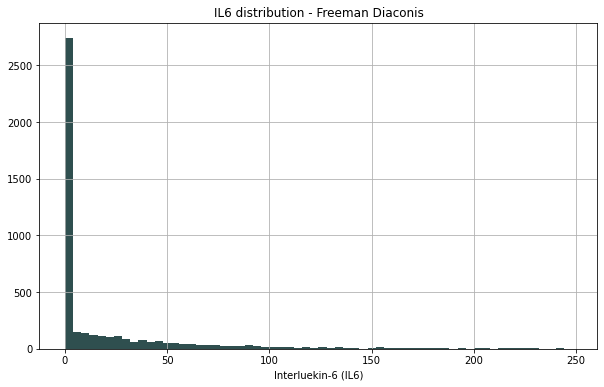

In [86]:
h = freeman_diaconis(df[df.interleukin6 <=250].interleukin6)
print("Freeman Diaconis: ", h)
mn = int(df[df.interleukin6 <=250].interleukin6.min())
mx = int(df[df.interleukin6 <=250].interleukin6.max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df[df.interleukin6 <=250].interleukin6,bins=bins, color="darkslategray")
axes.set_title("IL6 distribution - Freeman Diaconis")
axes.set_xlabel("Interluekin-6 (IL6)")

plt.grid()
plt.show()
plt.close()

Most patients had around 0 pg/mL, or close to it. The distribution is very positively skewed, as well. 

<a id="b33"></a>
### Ferritin

[Back to Contents](#Ind)

`ferritin` is a numerical variable that indicates the blood ferritin level for each patient. The normal range is 20 to 250 ng/mL for adult males, 10 to 120 ng/mL for adult females, and 12 to 263 ng/mL for females, 40 years and older. Since we do not have patient sexes in the data set, we could use an estimated range based on these ranges. Low levels of ferritin is a sign of low iron levels or anemia. 

In [87]:
df[df.ferritin == 0]

,length_of_stay,age,death,severity,black,white,asian,latino,myocardial_infarction,peripheral_vascular_disease,...,alanine_aminotransferase,white_blood_cell,lymphocytes,interleukin6,ferritin,C_reactive_protein,procalcitonin,troponin,race,temp_F
0,1,89,0,3,0,0,0,0,0,0,...,14.0000,5.6000,1.4000,0.0000,0.0000,0.4999,0.0000,0.0100,black,98.4000
5,14,74,1,5,0,1,0,0,0,0,...,15.0000,10.0000,0.5000,0.0000,0.0000,5.5000,2.1000,0.0100,white,101.8000
6,4,71,0,2,1,0,0,0,0,0,...,0.0000,5.4000,1.2000,0.0000,0.0000,7.3000,0.0000,0.0000,black,98.7000
13,1,88,1,6,1,0,0,0,0,0,...,10.0000,7.7000,0.6000,0.0000,0.0000,0.0000,0.0000,0.0000,black,99.9000
14,7,97,0,3,0,0,0,1,0,0,...,12.0000,4.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0100,latino,99.7000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4691,8,77,0,4,0,0,1,0,0,1,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,asian,98.0000
4695,0,58,0,0,0,0,0,1,0,1,...,12.0000,12.9000,2.3000,0.0000,0.0000,0.0000,0.0000,0.0000,latino,99.6000
4701,3,45,0,0,0,0,0,1,0,1,...,23.0000,10.2000,4.9000,0.0000,0.0000,0.0000,0.0000,0.0100,latino,98.0000
4704,0,68,0,3,0,0,0,0,0,1,...,78.0000,3.5000,1.1000,0.0000,0.0000,1.6000,0.0000,0.0100,black,100.6000


Since 1407 values are missing, since zero values are not possible, we do not need to look further into this variable since it will not be representative of the patients in the data set.

<a id="b34"></a>
### C-Reactive Protein

[Back to Contents](#Ind)

`C_reactive_protein` is a numerical variable indicating the c-reactive protein levels in a patients blood. The normal range is around 0.8-1.0 mg/dL (or 8-10 mg/L). However, lower values close to zero are also normal since most adults have less than 0.3 mg/dL. A positive C-reactive protein test indicates an active inflammatory condition. 

In [88]:
pd.DataFrame(df.C_reactive_protein.describe())

,C_reactive_protein
count,"4,711.0000"
mean,10.3149
std,11.2234
min,0.0000
25%,0.9000
50%,6.5000
75%,16.0000
max,100.0001


The mean c-reactive protein level for patients in the data set was 10.31 mg/dL, which is elevated compared to the normal ranges. Based on the quartiles and the median of 6.5 mg/dL, we would expect c-reactive protein to have a positively skewed distribution.

Freeman Diaconis:  2


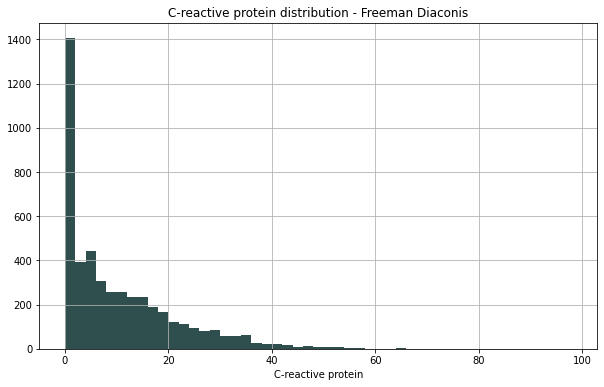

In [89]:
h = freeman_diaconis(df.C_reactive_protein)
print("Freeman Diaconis: ", h)
mn = int(df.C_reactive_protein.min())
mx = int(df.C_reactive_protein.max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.C_reactive_protein,bins=bins, color="darkslategray")
axes.set_title("C-reactive protein distribution - Freeman Diaconis")
axes.set_xlabel("C-reactive protein")

plt.grid()
plt.show()
plt.close()

As expected, the distribution is positively skewed since most patients had low levels of c-reactive protein. We would expect most patients who died from Covid-19 to have elevated levels of c-reactive protein, which we will confirm during the pairwise exploration. 

<a id="b35"></a>
### Procalcitonin

[Back to Contents](#Ind)

`procalcitonin` is a numerical variable that *can be zero*. The normal range for procalcitonin is less than 0.1 ng/mL. Levels greater than 0.25 ng/mL can indicate the presence of an infection. Let's look at the descriptive statistics:

In [90]:
pd.DataFrame(df.procalcitonin.describe())

,procalcitonin
count,"4,711.0000"
mean,1.5856
std,6.2626
min,0.0000
25%,0.0000
50%,0.1000
75%,0.4000
max,50.0001


The mean procalcitonin level in patients from the data set was 1.59 ng/mL, which is elevated compared to the normal range and indicates that the average patient in the data set was suffering from an infection. Since all patients in the cohort had Covid-19 and were admitted to the hospital for symptoms, this aligns with our domain knowledge. Based on the median, which is only 0.1 ng/mL, we expect the distribution to be positively skewed.

Freeman Diaconis:  1


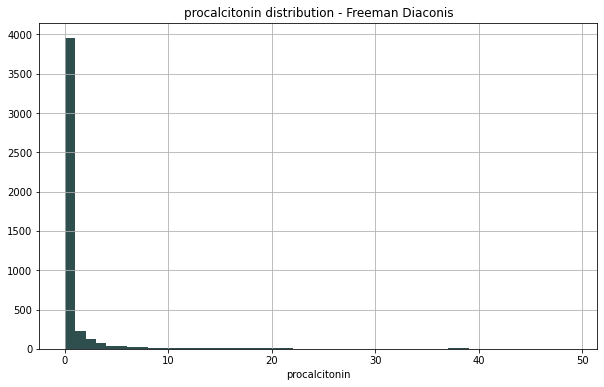

In [91]:
h = freeman_diaconis(df.procalcitonin)
print("Freeman Diaconis: ", h)
mn = int(df.procalcitonin.min())
mx = int(df.procalcitonin.max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.procalcitonin,bins=bins, color="darkslategray")
axes.set_title("procalcitonin distribution - Freeman Diaconis")
axes.set_xlabel("procalcitonin")

plt.grid()
plt.show()
plt.close()

As expected, most patients had a very low, or nearly 0 ng/mL, procalcitonin level while in the hospital. The distribution is very positively skewed, as a result. We would expect patients who died from Covid-19 to have even greater procalcitonin levels compared to patients who survived. 

<a id="b36"></a>
### Troponin

[Back to Contents](#Ind)

`troponin` is a numerical variable that represents the troponin levels in patients. The normal range is between 0 and 0.04 ng/mL, where higher levels could indicate a heart condition like atrial fibrillation or damage to the heart muscle, usually as a result of heart attack. Troponin has been well studied and used as a risk indicator for severe Covid-19 infection. Once again, this variable **can be zero**, so these are not missing or incorrect values.  

In [92]:
pd.DataFrame(df.troponin.describe())

,troponin
count,"4,711.0000"
mean,0.0516
std,0.2682
min,0.0000
25%,0.0100
50%,0.0100
75%,0.0200
max,9.5600


The mean troponin level was 0.05 ng/mL, which is slightly elevated from the normal range. If the resulting troponin levels align with domain knowledge, we would expect the elevated troponin levels to be a result of patients who died from Covid-19. Due to the median of 0.01 ng/mL, we expect a positively skewed distribution. 

Freeman Diaconis:  1


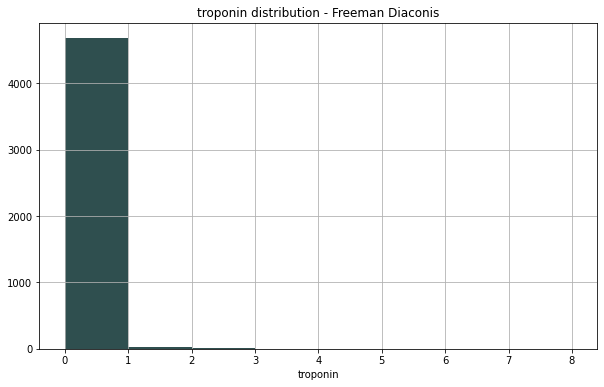

In [93]:
h = freeman_diaconis(df.troponin)
print("Freeman Diaconis: ", h)
mn = int(df.troponin.min())
mx = int(df.troponin.max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.troponin,bins=bins, color="darkslategray")
axes.set_title("troponin distribution - Freeman Diaconis")
axes.set_xlabel("troponin")

plt.grid()
plt.show()
plt.close()

Although its a bit hard to visualize, we do have a very positively skewed distribution for troponin. Most patients had very low troponin levels but there are a few cases that had troponin levels above 1 ng/mL. Ideally, these patients are from the cohort of patients who died from Covid-19. 

<a id="b37"></a>
### Length of Stay

[Back to Contents](#Ind)

The `length_of_stay` variable is a bit more arbitary. Do we expect patients who spent more time in the hospital to be more likely to succumb to Covid-19 infection? Or do patients who died from Covid-19 have shorter stays because they couldn't fight the infection for very long? Let's look at the descriptive statistics:

In [94]:
pd.DataFrame(df.length_of_stay.describe())

,length_of_stay
count,"4,711.0000"
mean,7.1603
std,7.0298
min,0.0000
25%,3.0000
50%,5.0000
75%,9.0000
max,56.0000


The mean number of days that a patient stayed in the hospital is 7.16 days, or about a week. Some patients did not stay overnight, while others stayed almost two months. Based on the median, which is 5 days, we expect a right skewed distribution:

Freeman Diaconis:  1


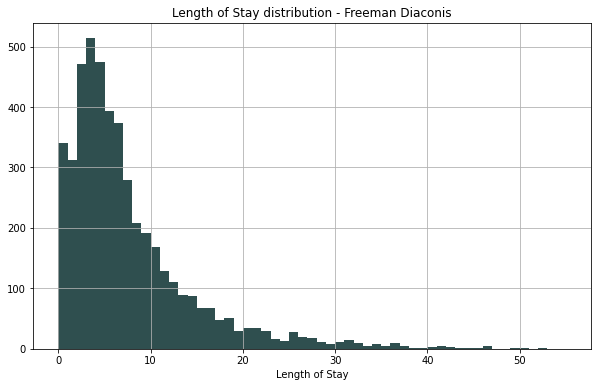

In [95]:
h = freeman_diaconis(df.length_of_stay)
print("Freeman Diaconis: ", h)
mn = int(df.length_of_stay.min())
mx = int(df.length_of_stay.max())
bins = [i for i in range( mn, mx, h)]

figure = plt.figure(figsize=(10, 6))

axes = figure.add_subplot(1, 1, 1)
axes.hist(df.length_of_stay,bins=bins, color="darkslategray")
axes.set_title("Length of Stay distribution - Freeman Diaconis")
axes.set_xlabel("Length of Stay")

plt.grid()
plt.show()
plt.close()

As expected, the distribution is right skewed. Until we get to the pairwise exploration of this variable with the target variable, its difficult to say what we *expect*. 

<a id="c"></a>
## Exploration of Pairwise Relationships

[Back to Contents](#Ind)

Now that we have looked at all the variables available in the data set, we can start narrowing down the features we want to include in pairwise exploration and how many rows we may need to drop due to missing blood panel results. Starting with our categorical variables, we can narrow down the variables of interest based on expected multicollinearity and domain knowledge as follows:

- race
- myocardial infarction
- peripheral vascular disease (PVD)
- congestive heart failure
- chronic pulmonary obstructive disease (COPD)
- diabetes mellitus simple
- renal disease
- all central nervous system disease (CNS)
- stroke
- seizure

For our numerical variables, can narrow down the variables as follows:

- age
- oxygen saturation ($SpO_2$)
- temperature
- mean arterial pressure (MAP)
- D-dimer
- platelets
- Creatinine
- Sodium
- Asparate aminotransferase
- Alanine aminotransferase
- White blood cells
- Interleukin6
- C-reactive Protein
- Procalcitonin
- Troponin

We can also drop about 300-400 of the rows, since they are missing most basic measurements like blood pressure or temperature and parts of the blood test results and only have information for the categorical variables. We can use temperature and MAP, to cover most missing values for other variables such as oxygen saturation, and use AST to cover most missing blood panel results.

In [96]:
data = df[((df.temp_F >= 95) & (df.temp_F <= 108)) & (df.mean_arterial_pressure != 0) & (df.aspartate_aminotransferase != 0)]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4225 entries, 0 to 4709
Data columns (total 42 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   length_of_stay                         4225 non-null   int64  
 1   age                                    4225 non-null   int64  
 2   death                                  4225 non-null   int64  
 3   severity                               4225 non-null   int64  
 4   black                                  4225 non-null   int64  
 5   white                                  4225 non-null   int64  
 6   asian                                  4225 non-null   int64  
 7   latino                                 4225 non-null   int64  
 8   myocardial_infarction                  4225 non-null   int64  
 9   peripheral_vascular_disease            4225 non-null   int64  
 10  congestive_heart_disease               4225 non-null   int64  
 11  card

We can pull up a few of the other variables to note that most missing values are now gone:

In [97]:
data[data.oxygen_saturation == 0]

,length_of_stay,age,death,severity,black,white,asian,latino,myocardial_infarction,peripheral_vascular_disease,...,alanine_aminotransferase,white_blood_cell,lymphocytes,interleukin6,ferritin,C_reactive_protein,procalcitonin,troponin,race,temp_F
2022,0,31,0,1,1,0,0,0,0,0,...,13.0000,4.6000,0.9000,0.0000,0.0000,1.0000,0.0000,0.0000,black,99.0000
3277,0,37,0,1,0,0,0,1,0,0,...,35.0000,7.1000,1.9000,0.0000,0.0000,0.0000,0.0000,0.0000,latino,98.3000
3925,7,67,0,2,0,0,0,0,0,0,...,15.0000,7.0000,1.5000,0.0000,0.0000,0.0000,0.0000,0.0000,black,97.5000


In [98]:
data[data.platelets == 0]

,length_of_stay,age,death,severity,black,white,asian,latino,myocardial_infarction,peripheral_vascular_disease,...,alanine_aminotransferase,white_blood_cell,lymphocytes,interleukin6,ferritin,C_reactive_protein,procalcitonin,troponin,race,temp_F
727,1,88,1,5,0,0,1,0,0,0,...,31.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.5000,0.0100,asian,97.7000
810,2,36,0,1,0,0,0,1,0,1,...,9.9990,0.0000,0.0000,0.0000,0.0000,1.2000,0.0000,0.0000,latino,97.8000
2977,2,37,0,1,0,0,0,0,0,1,...,9.9990,0.0000,0.0000,0.0000,0.0000,0.4999,0.0000,0.0000,black,98.5000
3474,3,26,0,0,0,0,0,1,0,0,...,11.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,latino,98.0000
3641,3,49,0,1,0,0,0,0,0,1,...,58.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4000,0.1200,black,97.3000
3854,0,73,0,8,0,0,0,1,0,1,...,27.0000,0.0000,0.0000,80.1000,490.0000,21.0000,0.9000,0.0800,latino,97.5000
3918,3,39,0,3,0,0,0,1,0,0,...,17.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,latino,98.1000


In [99]:
data[data.creatinine == 0]

,length_of_stay,age,death,severity,black,white,asian,latino,myocardial_infarction,peripheral_vascular_disease,...,alanine_aminotransferase,white_blood_cell,lymphocytes,interleukin6,ferritin,C_reactive_protein,procalcitonin,troponin,race,temp_F
1051,0,23,0,0,1,0,0,0,0,0,...,9.9990,8.3000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,98.5000
1744,4,41,0,1,1,0,0,0,1,1,...,196.0000,7.1000,1.3000,0.0000,0.0000,0.0000,0.0000,0.0000,black,98.0000
3351,3,38,0,0,0,0,0,0,0,0,...,12.0000,7.7000,1.5000,0.0000,0.0000,0.0000,0.0000,0.0000,black,98.1000
3641,3,49,0,1,0,0,0,0,0,1,...,58.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.4000,0.1200,black,97.3000
4111,34,67,0,1,0,0,0,0,0,0,...,15.0000,8.9000,1.8000,0.0000,0.0000,0.0000,0.0000,0.0000,black,98.2000


In [100]:
data[data.alanine_aminotransferase == 0]

,length_of_stay,age,death,severity,black,white,asian,latino,myocardial_infarction,peripheral_vascular_disease,...,alanine_aminotransferase,white_blood_cell,lymphocytes,interleukin6,ferritin,C_reactive_protein,procalcitonin,troponin,race,temp_F


In [101]:
data[data.sodium == 0]

,length_of_stay,age,death,severity,black,white,asian,latino,myocardial_infarction,peripheral_vascular_disease,...,alanine_aminotransferase,white_blood_cell,lymphocytes,interleukin6,ferritin,C_reactive_protein,procalcitonin,troponin,race,temp_F
129,34,68,0,4,1,0,0,0,0,1,...,9.9990,8.5000,0.7000,0.0000,602.0000,11.4000,0.2000,0.0100,black,98.0000
170,25,56,0,0,0,1,0,1,0,0,...,15.0000,8.3000,1.6000,96.3000,"1,240.0000",5.6000,0.1000,0.0100,white,100.3000
253,1,67,1,6,0,0,0,1,0,0,...,7.0000,4.3000,0.2000,"1,173.6000",597.0000,22.3000,3.6000,0.0700,latino,100.1000
284,26,64,0,4,0,0,0,1,0,1,...,19.0000,11.1000,1.0000,769.4200,142.0000,25.1000,3.3000,0.0100,latino,99.5000
353,10,59,0,1,1,0,0,0,0,0,...,22.0000,9.3000,0.9000,357.7000,"1,060.0000",12.0000,0.3000,0.0300,black,97.2000
430,14,65,1,6,1,0,0,0,0,0,...,12.0000,6.3000,0.6000,161.2000,"1,637.0000",18.8000,0.7000,0.0100,black,99.1000
632,4,74,0,8,1,0,0,0,1,1,...,24.0000,12.2000,0.9000,30.3000,804.0000,20.5000,0.0000,0.0100,black,98.3000
867,8,75,1,7,0,0,0,1,0,0,...,68.0000,12.2000,1.1000,40.4000,"2,208.0000",12.3000,0.4000,0.0100,latino,98.2000
1051,0,23,0,0,1,0,0,0,0,0,...,9.9990,8.3000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,black,98.5000
1203,21,67,1,5,1,0,0,0,0,1,...,31.0000,6.9000,0.8000,776.6400,533.0000,24.3000,0.9000,0.0100,black,100.9000


The rest of the missing values will be handled in modeling after we complete pairwise exploration, since they are actual missing values rather than entire missing test results. During each pairwise analysis, we will use the following helper function to visualize the relationships:

In [102]:
# Numerical vs Categorical
def multiboxplot(data, numeric, categorical, skip_data_points=True):
    figure = plt.figure(figsize=(10, 6))

    axes = figure.add_subplot(1, 1, 1)

    grouped = data.groupby(categorical)
    labels = pd.unique(data[categorical].values)
    labels.sort()
    grouped_data = [grouped[numeric].get_group( k) for k in labels]
    patch = axes.boxplot( grouped_data, labels=labels, patch_artist=True, zorder=1)

    if not skip_data_points:
        for i, k in enumerate(labels):
            subdata = grouped[numeric].get_group( k)
            x = np.random.normal(i + 1, 0.01, size=len(subdata))
            axes.plot(x, subdata, 'o', alpha=0.4, color="DimGray", zorder=2)

    axes.set_xlabel(categorical)
    axes.set_ylabel(numeric)
    axes.set_title("Distribution of {0} by {1}".format(numeric, categorical))

    plt.show()
    plt.close()

We will also use the following helper function to describe the death vs survived sub-groups when dealing with numerical variables:

In [103]:
def describe_by_category(data, numeric, categorical, transpose=False):
    grouped = data.groupby(categorical)
    grouped_y = grouped[numeric].describe()
    if transpose:
        return pd.DataFrame(grouped_y.transpose())
    else:
        return pd.DataFrame(grouped_y)

We will use the following helper function to calculate correlation coefficients as necessary:

In [104]:
def correlations(data, y, xs):
    rs = []
    rhos = []
    for x in xs:
        r = stats.pearsonr(data[y], data[x])[0]
        rs.append(r)
        rho = stats.spearmanr(data[y], data[x])[0]
        rhos.append(rho)
    return pd.DataFrame({"feature": xs, "r": rs, "rho": rhos})

Lastly, we will use this helper function to find the counts and proportions for both death subgroups when dealing with categorical variables:

In [105]:
def two_categorical(data, X, Y):
    counts = pd.crosstab(data[X], data[Y])
    freq = pd.crosstab( data[X], data[Y]).apply(lambda r: r/len(data), axis=1)
    return counts, freq

<a id="c0"></a>
### Death vs. Age

[Back to Contents](#Ind)

Naturally, we would expect older patients to have a higher mortality risk as a result of Covid-19. In addition, single variable exploration revealed that most patients at the hospital were also older, meaning older individuals seeked hospital care while infected with Covid-19. 

In [106]:
describe_by_category(data, 'age', 'death', transpose=True)

death,0,1
count,"3,202.0000","1,023.0000"
mean,60.9844,72.1916
std,16.5251,13.2628
min,18.0000,18.0000
25%,51.0000,64.0000
50%,62.0000,74.0000
75%,73.0000,82.0000
max,99.0000,103.0000


The mean age for patients who died from Covid-19 was 72.19 years, while the mean age for patients who survived Covid-19 was 60.98 years. This aligns with our expectation that older individuals were more at risk of poor outcomes as a result of Covid-19. Let's look at the correlation coefficients:

In [107]:
correlations(data, 'death', ['age'])

,feature,r,rho
0,age,0.2908,0.3000


There is a medium linear relationship, as indicated by the Pearson coefficient of 0.29, and a slightly stronger nonlinear relationship, as indicated by the Spearman coefficient of 0.30. Therefore, this variable will likely be beneficial to the logistic regression model.

Let's look at the box plots to get an idea of the distribution of ages for both groups:

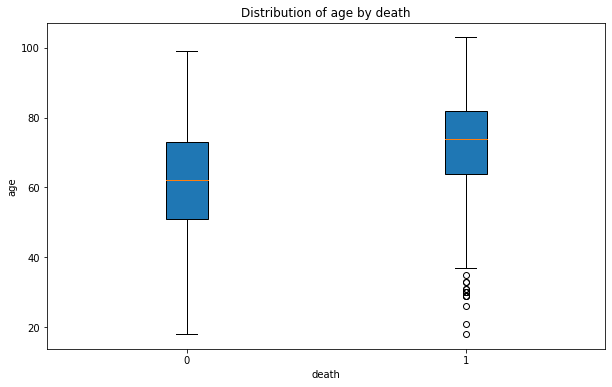

In [108]:
multiboxplot(data, 'age', 'death')

Although the ranges of ages are similar for both groups, patients who died from Covid-19 have a greater density of patients with higher ages. 

<a id="c01"></a>
### Death vs. Race

[Back to Contents](#Ind)

Most patients in our data set are black or latino, so we can expect that their corresponding proportions of patients who died as a result of Covid-19 will also be greater. 

In [109]:
counts, freq = two_categorical(data, 'death', 'race')

In [110]:
counts

race,asian,black,latino,white
death,,,,
0,72,1720,1112,298
1,36,524,344,119


In [111]:
freq

race,asian,black,latino,white
death,,,,
0,0.0170,0.4071,0.2632,0.0705
1,0.0085,0.1240,0.0814,0.0282


Based on proportions and counts, it does not seem like race made a significant difference on patient outcome. Still, we may benefit from using race in our linear model if certain races react differently to health conditions based on pre-existing conditions. 

<a id="c1"></a>
### Death vs. Myocardial Infarction

[Back to Contents](#Ind)

We would expect patients who have had heart attacks to have a higher likelihood of dying from Covid-19 infection. Let's start with looking at value counts and proportions for patients who died versus patients who survived:

In [112]:
counts, freq = two_categorical(data, 'death', 'myocardial_infarction')

In [113]:
counts

myocardial_infarction,0,1
death,,
0,3066,136
1,974,49


In [114]:
freq

myocardial_infarction,0,1
death,,
0,0.7257,0.0322
1,0.2305,0.0116


As we would expect, the largest group is patients who survived and have never had a heart attack. The second largest group is those who have died and never had a heart attack. Interestingly, the smallest group is those who died and had a heart attack, which makes sense since the sample of patients with heart attack history was already small. 

If we look at proportions within the same groups by looking at the counts, we can see that a little over a one fourth of patients who have had heart attacks died from Covid-19, compared to slightly less than a fourth of patients without heart attack history who died from Covid-19. 

<a id="c2"></a>
### Death vs. Peripheral Vascular Disease

[Back to Contents](#Ind)

There are three possible categories for `peripheral_vascular_disease`, where 0: no PVD diagnosis, 1: Grade I PVD, and 2: Grade II PVD. As we saw during single variable exploration, there are no patients in the data set with Grade III or Grade IV PVD, which are more severe cases. Research surrounding Covid-19 has emphasized the risk of blood clotting during infection in severe cases which may result in heart attacks, strokes, and organ dysfunction. Therefore, we would expect individuals with PVD, which is a blood circulation disease, to increase the risk of death from Covid-19 infection. 

In [115]:
counts, freq = two_categorical(data, 'death', 'peripheral_vascular_disease')

In [116]:
counts

peripheral_vascular_disease,0,1,2
death,,,
0,2597,575,30
1,905,116,2


In [117]:
freq

peripheral_vascular_disease,0,1,2
death,,,
0,0.6147,0.1361,0.0071
1,0.2142,0.0275,0.0005


Among patients with PVD, we don't see a huge proportion that have died. Of patients with Grade I PVD, 13.61% survived and 2.75% died. Only 32 individuals in the data set had Grade II PVD, so this may not be representative of the risks that Grade II PVD have on Covid-19 outcomes. Around 18% of patients with PVD died from Covid-19 compared to about one fourth of patients without PVD that died. 

<a id="c3"></a>
### Death vs. Congestive Heart Disease

[Back to Contents](#Ind)

We would expect congestive heart disease to increase mortality risk in a patient with Covid-19, but our results from myocardial infarction may indicate that heart conditions, alone, are not a good indicator of survivability. They *may* be a good indicator of severity, but that is not relevant for the model for `death`.

In [118]:
counts, freq = two_categorical(data, 'death', 'congestive_heart_disease')

In [119]:
counts

congestive_heart_disease,0,1
death,,
0,2846,356
1,886,137


In [120]:
freq

congestive_heart_disease,0,1
death,,
0,0.6736,0.0843
1,0.2097,0.0324


8.43% of patients survived and had congestive heart disease compared to 3.24% of patients who died and had congestive heart disease. Like myocardial infarction, heart conditions may not be good predictors of mortality from a Covid-19 infection since having these conditions doesn't seem to have a huge impact on survivability, **on its own**. About 27% of individuals who had congestive heart disease died from Covid-19 infection and about 23% of individuals without congestive heart disease **also** died. 

<a id="c4"></a>
### Death vs. Chronic Pulmonary Obstructive Disease (COPD)

[Back to Contents](#Ind)

COPD was well discussed by the CDC and other health agencies as a risk factor for severe Covid-19 infection. Therefore, we would expect more individuals with COPD to suffer from severe infection or death compared to individuals without COPD.

In [121]:
counts, freq = two_categorical(data, 'death', 'chronic_obstructive_pulmonary_disease')

In [122]:
counts

chronic_obstructive_pulmonary_disease,0,1
death,,
0,3030,172
1,955,68


In [123]:
freq

chronic_obstructive_pulmonary_disease,0,1
death,,
0,0.7172,0.0407
1,0.2260,0.0161


Around a third of patients, if we refer to the counts, who had COPD died from Covid-19 infection. In contrast, about a fourth of patients without COPD died from Covid-19. COPD seems to result in more instances of death, so it will be beneficial for our model.

<a id="c5"></a>
### Death vs. Diabetes

[Back to Contents](#Ind)

Diabetes on its own was not considered a major risk factor for severe Covid-19 complications, but obesity and other conditions are. In other words, diabetes may have a correlation with severe outcomes in patients with other conditions or characteristics. 

In [124]:
counts, freq = two_categorical(data, 'death', 'diabetes_mellitus_simple')

In [125]:
counts

diabetes_mellitus_simple,0,1
death,,
0,2744,458
1,873,150


In [126]:
freq

diabetes_mellitus_simple,0,1
death,,
0,0.6495,0.1084
1,0.2066,0.0355


If we look at the counts, about one fourth of patients with diabetes died from Covid-19 and one fourth of patients without diabetes also died from Covid-19, so diabetes may not be a good indicator of death in Covid-19 patients, at least not on its own. 

<a id="c6"></a>
### Death vs. Renal Disease

[Back to Contents](#Ind)

Kidney dysfunction and failure was noted as a common occurrence in severe Covid-19 patients, especially due to severe dehydration. Therefore, we would expect any renal conditions to affect patient outcomes. 

In [127]:
counts, freq = two_categorical(data, 'death', 'renal_disease')

In [128]:
counts

renal_disease,0,1
death,,
0,2666,536
1,807,216


In [129]:
freq

renal_disease,0,1
death,,
0,0.6310,0.1269
1,0.1910,0.0511


If we look at the counts, slightly less than one third of patients with renal disease died from Covid-19, compared to slightly less than a fourth of patients who did not have renal disease who died. Therefore, renal disease and potentially all kidney related variables would be beneficial for the logistic regression model. 

<a id="c7"></a>
### Death vs. Central Nervous System Disease (CNS)

[Back to Contents](#Ind)

CNS diseases usually include epilepsy, rheumatoid arthritis, dementia, and many other diseases that affect the central nervous system. Since this is relatively broad, we may or may not see a correlation between death and these conditions and it may be dependent on other variables.

In [130]:
counts, freq = two_categorical(data, 'death', 'all_central_nervous_system_disease')

In [131]:
counts

all_central_nervous_system_disease,0,1
death,,
0,2859,343
1,840,183


In [132]:
freq

all_central_nervous_system_disease,0,1
death,,
0,0.6767,0.0812
1,0.1988,0.0433


About one third of patients with a CNS disease died from Covid-19, compared to slightly less than a fourth of patients without a CNS disease that died. 

<a id="c8"></a>
### Death vs. Stroke

[Back to Contents](#Ind)

Based on the single variable exploration results, I do not expect to have many instances of patients who have had strokes in the data set. Normally, we would expect mortality from Covid-19 to be higher among patients who had had strokes since strokes themselves can be very fatal. 

In [133]:
counts, freq = two_categorical(data, 'death', 'stroke')

In [134]:
counts

stroke,0,1
death,,
0,3176,26
1,1001,22


In [135]:
freq

stroke,0,1
death,,
0,0.7517,0.0062
1,0.2369,0.0052


Although the number of patients with strokes is small, almost all patients who suffered from a stroke died from Covid-19 infection.  If we recall CDC research, blood clotting, which can be exacerbated by Covid-19, can cause strokes by restricting blood flow to the brain. Therefore, stroke is likely a good predictor of death as a result of Covid-19 infection.

<a id="c9"></a>
### Death vs. Seizure

[Back to Contents](#Ind)

Since seizures fall under CNS diseases, we would expect patients who suffer from seizures to have a greater risk of death from Covid-19. 

In [136]:
counts, freq = two_categorical(data, 'death', 'seizure')

In [137]:
counts

seizure,0,1
death,,
0,3178,24
1,1014,9


In [138]:
freq

seizure,0,1
death,,
0,0.7522,0.0057
1,0.2400,0.0021


About one third of patients who suffered from seizures died from Covid-19, compared to slightly less than one fourth of patients who did not have a history of seizures and died from Covid-19. 

<a id="c10"></a>
### Death vs. Oxygen Saturation

[Back to Contents](#Ind)

Based on domain knowledge, especially from studies during the pandemic, Covid-19 results in lower oxygen saturation levels due to lung dysfunction which prevents hemoglobin from becoming enriched with oxygen. We would expect this to be representative in the data set. Let's look at the descriptive statistics for patients who survived and patients who died:

In [139]:
describe_by_category(data[data.oxygen_saturation != 0], 'oxygen_saturation', 'death', transpose=True)

death,0,1
count,"3,199.0000","1,023.0000"
mean,93.7455,89.5308
std,6.8274,11.0920
min,11.0000,22.0000
25%,92.0000,86.0000
50%,95.0000,93.0000
75%,98.0000,97.0000
max,100.0000,100.0000


The mean oxygen saturation is 93.75% for patients who survived, which is a bit lower than the "normal" range but is above the 92% threshold for cause of concern. The mean oxygen saturation is 89.53% for patients who died from Covid-19, which is below the threshold and is a cause for concern. Let's look at the correlation coefficients:

In [140]:
correlations(data[data.oxygen_saturation != 0], 'death', ['oxygen_saturation'])

,feature,r,rho
0,oxygen_saturation,-0.2184,-0.1778


As expected, there is a negative linear relationship, as indicated by the Pearsons coefficent of -0.22, and negative nonlinear relationship, as indicated by the Spearmans coefficient of -0.18. Finally, let's look at the multibox plot to see how the distributions of both groups compare:

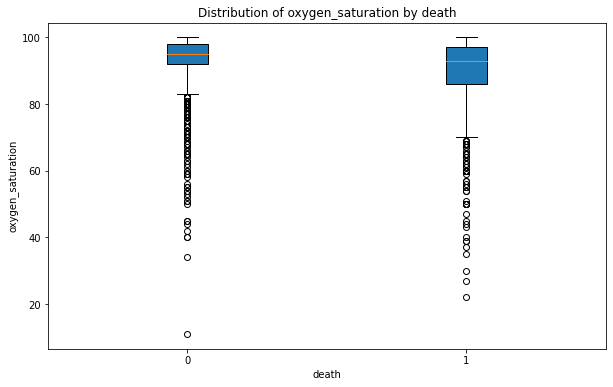

In [141]:
multiboxplot(data[data.oxygen_saturation != 0], 'oxygen_saturation', 'death')

Although low oxygen saturation levels occurred in patients who survived, patients who died from Covid-19 had lower oxygen saturation levels on average and had a more dispersed distribution of oxygen saturation levels. 

<a id="c11"></a>
### Death vs. Temperature 

[Back to Contents](#Ind)

Although major health agencies listed fever as a possible side effect of Covid-19, it was not required for severe infection. Therefore, there may or may not be a significant relationship between temperature and poor patient outcomes depending on the patients and other variables. 

In [142]:
describe_by_category(data, 'temperature', 'death', transpose=True)

death,0,1
count,"3,202.0000","1,023.0000"
mean,37.3366,37.3774
std,0.8457,0.8948
min,35.0000,35.0000
25%,36.7778,36.7778
50%,37.1111,37.1667
75%,37.7222,37.8889
max,41.6667,40.4444


The mean temperature for patients who survived and patients who died is almost the same. Most of the descriptive statistics are also the same, which implies that the relationship between death and temperature is likely very weak. Let's look at the coefficients:

In [143]:
correlations(data, 'death', ['temperature'])

,feature,r,rho
0,temperature,0.0204,0.0180


There is a very weak linear and non linear relationship between temperature and Covid-19, as indicated by the Pearsons coefficient of 0.02 and the Spearmans coefficient of 0.02. 

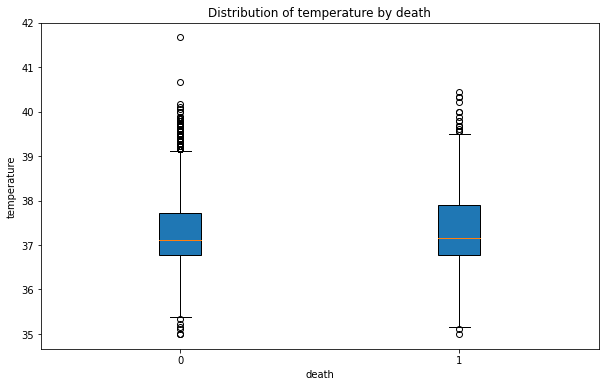

In [144]:
multiboxplot(data, 'temperature', 'death')

The box plot implies the same idea as the descriptive statistics and the coefficients. Temperature does not seem to have a very different distribution of values for patients who survived versus patients who died. 

<a id="c12"></a>
### Death vs. Mean Arterial Pressure (MAP)

[Back to Contents](#Ind)

Increased MAP levels are associated with blood clots or heart damage and decreased MAP levels are associated with blood circulation issues, where blood is not reaching major organs. Therefore, we would expect patients who died from Covid-19 to exhibit **low** MAP levels since vascular diseases are considered a risk factor. However, our results from *death vs. PVD* did not seem significant. Let's look at the descriptive statistics:

In [145]:
describe_by_category(data, 'mean_arterial_pressure', 'death', transpose=True)

death,0,1
count,"3,202.0000","1,023.0000"
mean,89.1679,74.4497
std,12.7604,22.0091
min,26.0000,23.3333
25%,81.0000,58.1667
50%,89.3333,75.6667
75%,97.3333,90.0000
max,133.3333,138.3333


As expected, patients with who died from Covid-19 had a mean MAP of 74.45 mm Hg while patients who survived had a higher mean MAP of 89.17 mm Hg. We can hypothesize that the correlation coefficients will be higher compared to relationships we have look at thus far.

In [146]:
correlations(data, 'death', ['mean_arterial_pressure'])

,feature,r,rho
0,mean_arterial_pressure,-0.3766,-0.3096


There is a medium, negative linear relationship, as indicated by the Pearson coefficient of -0.38, and a medium, negative nonlinear relationship, as indicated by the Spearman coefficient of -0.31. How about the distribution of MAP levels for each group?

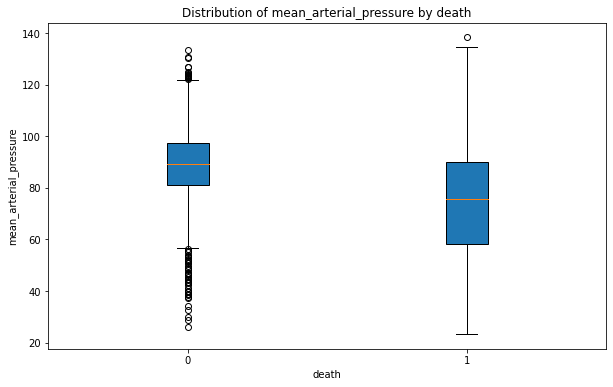

In [147]:
multiboxplot(data, 'mean_arterial_pressure', 'death')

MAP levels for patients who died from Covid-19 are more dispersed and generally lower than the MAP levels for patients who survived Covid-19 infection. This variable will be very beneficial for the linear model. 

<a id="c13"></a>
### Death vs. D-dimer

[Back to Contents](#Ind)

D-dimer levels are used to indicate the presence of a blood clot, which is known to occur in severe Covid-19 infections. We would expect patients who died from Covid-19 to have overall higher D-dimer levels in the blood.

In [148]:
describe_by_category(data, 'D_dimer', 'death', transpose=True)

death,0,1
count,"3,202.0000","1,023.0000"
mean,2.8249,5.0631
std,4.6479,6.7687
min,0.0000,0.0000
25%,0.4200,0.5450
50%,1.1600,1.9400
75%,2.7200,5.9550
max,20.0000,20.0000


As expected, patients who died from Covid-19 had a higher mean D-dimer level of 5.06 u/mL compared to patients who survived who had a mean D-dimer level of 2.83 u/mL. In addition, the distribution of D-dimer levels, based on the quartiles, for patients who died from Covid-19 is skewed more to the left compared to patients who survived. 

In [149]:
correlations(data, 'death', ['D_dimer'])

,feature,r,rho
0,D_dimer,0.1800,0.1269


There is a medium to weak linear relationship, as indicated by the Pearson's coefficient of 0.18, and a medium to weak nonlinear relationship, as indicated by the Spearman coefficient of 0.13. 

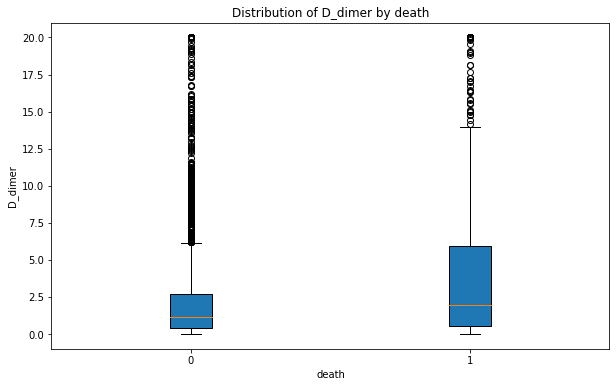

In [150]:
multiboxplot(data, 'D_dimer', 'death')

As stated above, patients who died from Covid-19 had a more dispersed distribution of D-dimer levels compared to patients who survived. In addition, patients who died had a higher D-dimer level, on average, which indicates organ damage due to decreased blood flow while fighting Covid-19. 

<a id="c14"></a>
### Death vs. Platelets

[Back to Contents](#Ind)

For platelet counts, the normal range is 150,000 to 450,000 platelets per microliter of blood, as stated during the domain knowledge section. A high platelet count can indicate an infection while a low platelet count can cause blood thinning and excessive bleeding. Therefore, we may expect patients who survived Covid-19 to have higher platelet counts, since they are actively fighting the infection, compared to patients who succumbed to severe Covid-19 infections.

In [151]:
describe_by_category(data[data.platelets != 0], 'platelets', 'death', transpose=True)

death,0,1
count,"3,196.0000","1,022.0000"
mean,239.8967,219.1526
std,109.1479,97.6330
min,1.0000,5.0000
25%,169.0000,153.2500
50%,220.0000,200.0000
75%,285.0000,266.0000
max,"1,226.0000",796.0000


As expected, patients who died from Covid-19 had lower average platelet counts, which was 219,153 platelets/uL, compared to patients who survived Covid-19, who had a mean count of 239,897 platelets/uL. 

In [152]:
correlations(data[data.platelets != 0], 'death', ['platelets'])

,feature,r,rho
0,platelets,-0.0832,-0.0916


Although a negative, linear relationship (r = -0.08) and a negative non linear realtionship (rho = -0.09) exists between these variables, it is relatively weak. How do the distributions look?

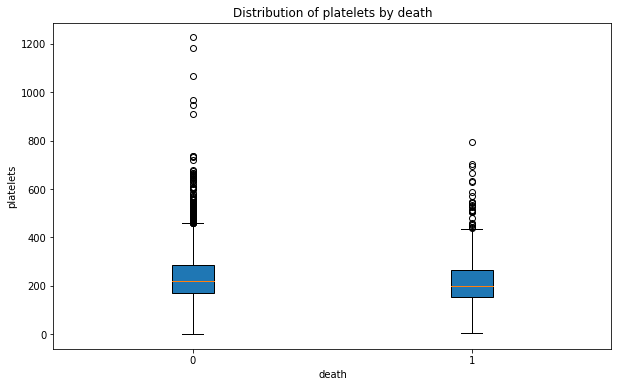

In [153]:
multiboxplot(data[data.platelets != 0], 'platelets', 'death')

The distribution makes it more evident that patients who died from Covid-19 had a lower platelet count compared to patients who survived Covid-19 after hospital admission. Although the means appear similar, there are many more instances of patients who had even higher platelet counts than the normal range who survived. 

<a id="c15"></a>
### Death vs. Creatinine

[Back to Contents](#Ind)

The normal range for creatinine levels is 0.6 to 1.3 mg/dL (61.9 to 114.9 µmol/L). In the case of kidney dysfunction, the kidneys are unable to efficiently filter which results in high creatinine levels in the blood. Low creatinine levels can be due to low muscle density or a liver condition. Since renal disease seemed to impact Covid-19 outcome, we would expect creatinine to be higher in patients who died compared to patients who survived.

In [154]:
describe_by_category(data[data.creatinine != 0], 'creatinine', 'death', transpose=True)

death,0,1
count,"3,197.0000","1,023.0000"
mean,1.7998,2.5819
std,2.4002,2.7413
min,0.2000,0.4000
25%,0.8000,1.0000
50%,1.0100,1.5200
75%,1.5600,2.9000
max,29.2200,22.2000


As expected, the mean creatinine levels for patients who died is higher, at 2.58 mg/dL, while patients who survived had a mean creatinine level of 1.80 mg/dL. For both groups, creatinine levels are elevated from normal levels but patients who died from Covid-19 suffered more kidney issues that may have contributed to death.

In [155]:
correlations(data[data.creatinine != 0], 'death', ['creatinine'])

,feature,r,rho
0,creatinine,0.1336,0.2433


There is a somewhat weak linear relationship (r = 0.13) and a stronger nonlinear relationship (rho = 0.24). Perhaps creatinine is a good candiate for an interaction term, in that case. 

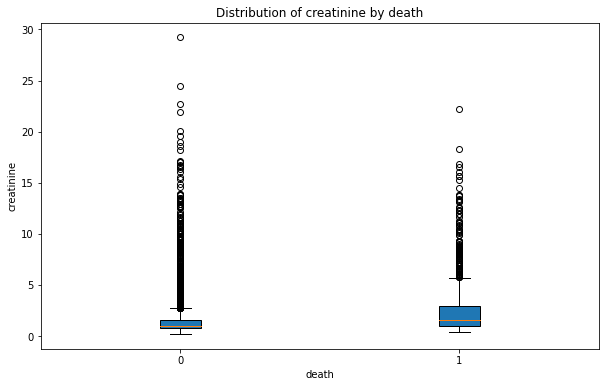

In [156]:
multiboxplot(data[data.creatinine != 0], 'creatinine', 'death')

Creatinine levels were much more dispersed in patients who survived, interestingly. However, the majority of patients who survived had a lower creatinine level, on average. Once again, it seems like creatinine may be a good candidate for an interaction term. 

<a id="c16"></a>
### Death vs. Sodium

[Back to Contents](#Ind)

The normal range for sodium is typically between 135 and 145 milliequivalents per liter (mEq/L). A low sodium level usually indicates organ issues, such as kidney or heart failure and cirrhosis. A high sodium level typically indicates dehydration or kidney dysfunction. Based on domain knowledge and the relationships we have seen thus far, we would expect patients who died from Covid-19 to have higher sodium levels due to dehydration and kidney dysfunction, rather than low levels due to organ failure. Blood circulation, blood clotting, and blood toxicity due to organ **dysfunction** seems to be a bigger risk factor than organ damage or failure for Covid-19 infection.

In [157]:
describe_by_category(data[data.sodium != 0], 'sodium', 'death', transpose=True)

death,0,1
count,"3,180.0000","1,004.0000"
mean,137.5670,139.6793
std,6.7553,9.2716
min,105.0000,114.0000
25%,134.0000,134.0000
50%,137.0000,138.0000
75%,140.0000,143.0000
max,170.0010,170.0010


Patients who died from Covid-19 have a higher mean sodium level, at 139.68 mEq/L, compared to patients who survived. However, it's not a huge difference since patients who survived had a mean sodium level of 137.57 mEq/L and, in both cases, the sodium levels are within the normal range. 

In [158]:
correlations(data[data.sodium != 0], 'death', ['sodium'])

,feature,r,rho
0,sodium,0.1204,0.0830


There is a medium to weak linear relationship between sodium and death from Covid-19 (r = 0.12), and a weaker nonlinear relationship (rho = 0.08). However, I do not feel convinced that sodium is very indicative, yet.

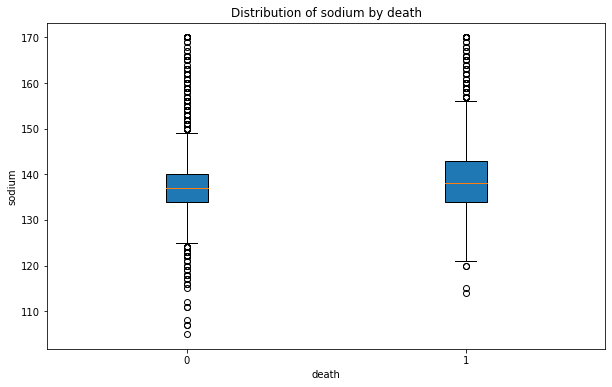

In [159]:
multiboxplot(data[data.sodium != 0], 'sodium', 'death')

Based on the distributions, it's more convincing that patients who died had higher sodium levels. Interestingly, patients who survived had even *lower* levels than normal, which could be due to diet during their hospital stay (low sodium intake or no appetite). 

<a id="c17"></a>
### Death vs. Asparate Aminotransferase (AST)

[Back to Contents](#Ind)

AST levels are used to predict liver disease, although AST can become elevated from heart and lung conditions. The normal range for AST is 8 to 33 U/L. The best way to implement AST in the model will likely be as a ratio with ALT. We expect patients who died from Covid-19 to have higher AST levels than patients who survived.

In [160]:
describe_by_category(data, 'aspartate_aminotransferase', 'death', transpose=True)

death,0,1
count,"3,202.0000","1,023.0000"
mean,56.9209,89.5210
std,100.6902,242.4302
min,13.0000,14.0000
25%,26.0000,32.0000
50%,37.0000,51.0000
75%,61.0000,79.5000
max,"2,681.0000","4,871.0000"


Both groups had elevated levels of AST, but patients who died from Covid-19 had even higher elevated levels of AST compared to patients who survived. Specifically, patients who died had a mean AST of 89.52 U/L while patients who survived had a mean AST of 59.92 U/L. 

In [161]:
correlations(data, 'death', ['aspartate_aminotransferase'])

,feature,r,rho
0,aspartate_aminotransferase,0.0940,0.1677


There is a somewhat weak linear relationship (r = 0.09) and a stronger nonlinear relationship (rho = 0.17) between AST and death. Once again, using a ratio or an interaction term may benefit the model.

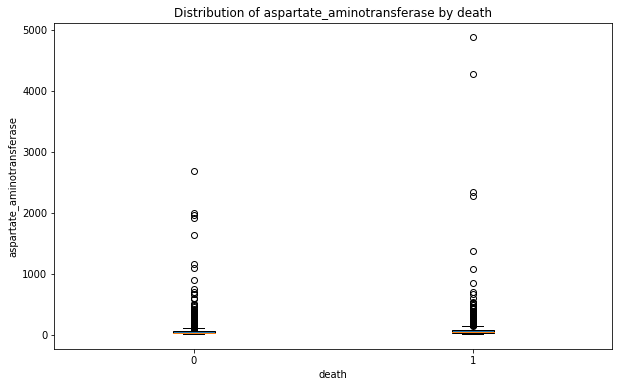

In [162]:
multiboxplot(data, 'aspartate_aminotransferase', 'death')

Although AST levels were elevated in both groups, patients who died from Covid-19 had even greater elevation in their AST levels, as stated. 

<a id="c18"></a>
### Death vs. Alanine Aminotransferase (ALT)

[Back to Contents](#Ind)

ALT is considered more "specific" than AST since it is indicative of liver conditions **only** and more accurately.  The normal range for ALT is 4 to 36 U/L, where higher values indicate a liver condition. We expect patients to have higher ALT levels if they died while in the hospital for Covid-19 compared to patients who survived.

In [163]:
describe_by_category(data, 'alanine_aminotransferase', 'death', transpose=True)

death,0,1
count,"3,202.0000","1,023.0000"
mean,41.7017,55.6637
std,73.6922,187.5633
min,6.0000,7.0000
25%,17.0000,17.0000
50%,27.0000,28.0000
75%,45.0000,44.0000
max,"2,178.0000","3,228.0000"


As expected, patients who died from Covid-19 had more elevated levels of ALT compared to patients who survived. However, the difference seems less significant than AST. 

In [164]:
correlations(data, 'death', ['alanine_aminotransferase'])

,feature,r,rho
0,alanine_aminotransferase,0.0532,0.0235


There is a weak linear relationship (r = 0.05) and a weaker nonlinear relationship (rho = 0.02) between ALT and death. Patients who died from Covid-19 had higher levels of ALT than patients who survived, but it is not as significant as AST.

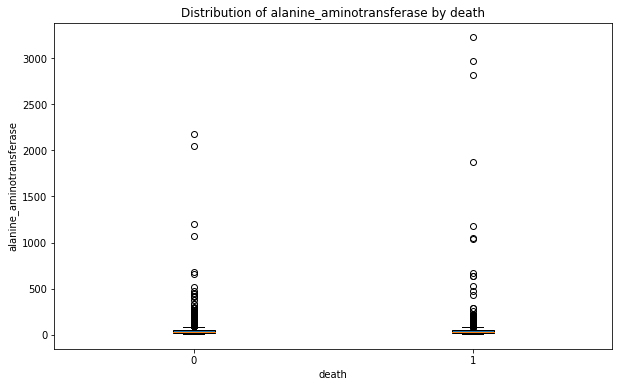

In [165]:
multiboxplot(data, 'alanine_aminotransferase', 'death')

Once again, higher ALT levels are present in patients who died from Covid-19, but the significance is much less apparent compared to AST and poor patient outcomes.

<a id="c19"></a>
### Death vs. White Blood Cells (WBC)

[Back to Contents](#Ind)

The normal WBC range is anywhere from 4,500 to 11,000 WBCs per microliter (4.5 to 11.0 × $10^9/L$), where higher WBC counts can indicate an active infection and lower WBC may indicate vitamin deficiencies, Lupus, rheumatoid arthritis, or side effects from cancer treatment. Therefore, we would expect patients who died from Covid-19 to have higher white blood cell counts.

In [166]:
describe_by_category(data[data.white_blood_cell != 0], 'white_blood_cell', 'death', transpose=True)

death,0,1
count,"3,196.0000","1,022.0000"
mean,8.5052,9.5972
std,6.8457,8.9326
min,0.4000,0.2000
25%,5.5000,6.0000
50%,7.3000,8.1000
75%,10.1000,11.3750
max,202.7000,219.7000


The mean WBC count for patients who died from Covid-19 is 9.60 × $10^9/L$ while the mean WBC count for patients who survived is 8.51 × $10^9/L$. In addition the distribution of WBC counts for patients who died is skewed more to the left. 

In [167]:
correlations(data[data.white_blood_cell != 0], 'death', ['white_blood_cell'])

,feature,r,rho
0,white_blood_cell,0.0631,0.0924


There is a weak linear relationship (r = 0.06) and a stronger nonlinear relationship (rho = 0.09) between WBC counts and death.

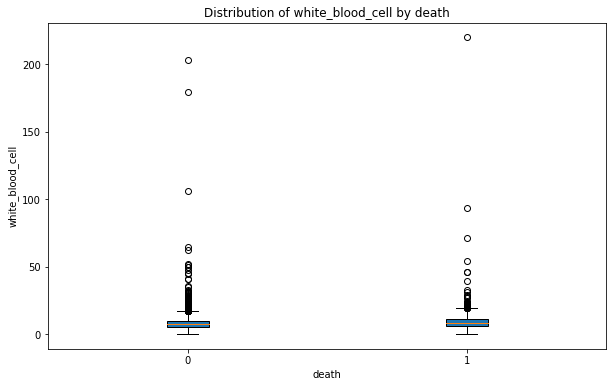

In [168]:
multiboxplot(data[data.white_blood_cell != 0], 'white_blood_cell', 'death')

The elevated WBC counts in patients who died from Covid-19 is not as obvious in the box plot. Since there is a stronger nonlinear relationship, this variable may benefit from an interaction term in the model. 

<a id="c20"></a>
### Death vs. Interleukin-6

[Back to Contents](#Ind)

The normal range for IL-6 is between 0 and 43.5 pg/ml, although its usually around 5.186 pg/ml. A high IL-6 may indicate an active inflammatory condition, an increased risk of mortality, and an increased risk for ventilation requirements. Therefore, we expect patients who died from Covid-19 to have very elevated levels of IL-6.        

In [169]:
describe_by_category(data, 'interleukin6', 'death', transpose=True)

death,0,1
count,"3,202.0000","1,023.0000"
mean,74.4749,291.0267
std,"1,980.4686","2,981.0428"
min,0.0000,0.0000
25%,0.0000,0.0000
50%,0.0000,0.0000
75%,27.3000,73.1550
max,"111,040.0000","67,382.5000"


Patients who died from Covid-19 had a much higher IL-6 level, even with the extreme value (114,000 pg/mL) that we looked at during single variable exploration. The mean IL-6 level for patients who survived Covid-19 was 74.48 pg/mL, compared to the mean IL-6 level for patients who died which was 291.03 pg/mL. 

In [170]:
correlations(data, 'death', ['interleukin6'])

,feature,r,rho
0,interleukin6,0.0410,0.0670


Interestingly, the correlation coefficients are a bit low. This could be due to the extreme values. For all the data, there is a weak linear relationship (r = 0.04) and a stronger nonlinear relationship (rho = 0.07) between WBC counts and death. Let's look at the correlation coefficients when we remove these values, temporarily:

In [171]:
correlations(data[data.interleukin6 <=50000], 'death', ['interleukin6'])

,feature,r,rho
0,interleukin6,0.0903,0.0658


The Pearson's correlation coefficient increased a bit when we removed these values, to 0.09. The Spearman's coefficient is slightly lower, at 0.66. Since outliers aren't a *huge* issue for logistic regression, we won't remove these patients since they are still useful for all other variables.

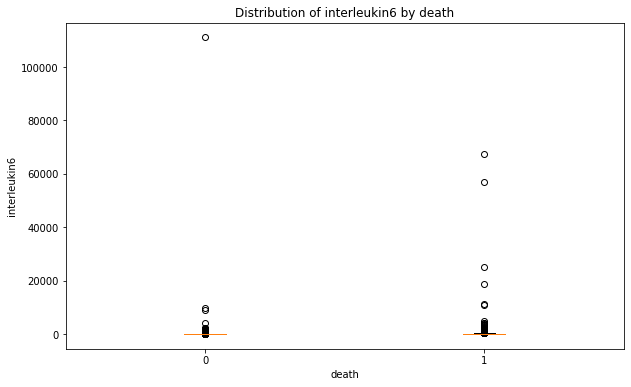

In [172]:
multiboxplot(data, 'interleukin6', 'death')

Based on the box plots, we can see that patients who died from Covid-19 had higher levels of IL-6, overall. We can also see the single extreme value for one patient who survived and the two extreme values for two patients who died. These could be due to comorbidities with Covid-19 that caused extremely elevated levels, since domain knowledge tells us that these levels *are possible*. For example, these three patients could have some form of cancer that also influenced their IL-6 levels.

<a id="c21"></a>
### Death vs. C-reactive protein

[Back to Contents](#Ind)

The normal range for c-reactive protein is around 0.8-1.0 mg/dL (or 8-10 mg/L). However, lower values close to zero are also normal since most adults have less than 0.3 mg/dL. A positive C-reactive protein test indicates an active inflammatory condition. We would expect most patients who died from Covid-19 to have elevated levels of c-reactive protein 

In [173]:
describe_by_category(data, 'C_reactive_protein', 'death', transpose=True)

death,0,1
count,"3,202.0000","1,023.0000"
mean,9.4795,15.1854
std,10.0361,13.2891
min,0.0000,0.0000
25%,1.4000,4.3000
50%,6.1000,13.1000
75%,14.5000,23.2000
max,100.0001,100.0001


The mean c-reactive protein level for patients who died was 15.19 mg/dL, which is higher than the mean c-reactive protein level for patients that survived, who had a mean c-reactive protein level of 9.48 mg/dL. Let's look at the correlation coefficients:

In [174]:
correlations(data, 'death', ['C_reactive_protein'])

,feature,r,rho
0,C_reactive_protein,0.2186,0.1816


There is a medium linear relationship, as indicated by the Pearson's coefficient of 0.22, and a slightly weaker nonlinear relationship, as indicated by the Spearman's coefficient of 0.18. 

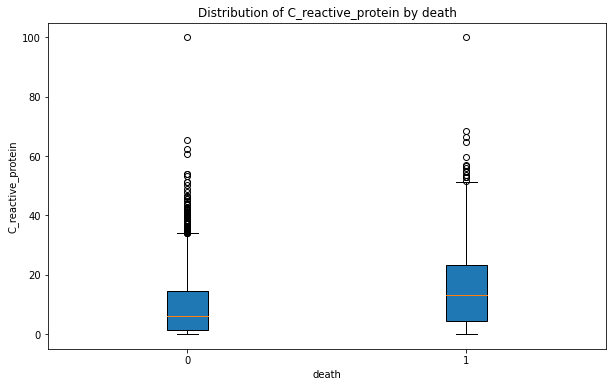

In [175]:
multiboxplot(data, 'C_reactive_protein', 'death')

Besides the two more extreme values, patients who died as a result of Covid-19 had higher c-reactive protein levels compared to patients who survived. 

<a id="c22"></a>
### Death vs. Procalcitonin

[Back to Contents](#Ind)

The normal range for procalcitonin is less than 0.1 ng/mL. Levels greater than 0.25 ng/mL can indicate the presence of an infection. We would expect patients who died from Covid-19 to have higher levels of procalcitonin compared to patients who survived. 

In [176]:
describe_by_category(data, 'procalcitonin', 'death', transpose=True)

death,0,1
count,"3,202.0000","1,023.0000"
mean,1.0239,3.5973
std,4.7836,9.6807
min,0.0000,0.0000
25%,0.0000,0.0000
50%,0.1000,0.3000
75%,0.3000,1.6000
max,50.0001,50.0001


Patients who died from Covid-19 had higher levels of procalcitonin, at 3.60 ng/mL, compared to patients who survived, at 1.02 ng/mL. In both cases, the mean procalcitonin levels were elevated compared to the normal range which aligns with domain knowledge and our expectation. 

In [177]:
correlations(data, 'death', ['procalcitonin'])

,feature,r,rho
0,procalcitonin,0.1717,0.1888


There is a medium to weak relationship (r = 0.17) and a slightly stronger nonlinear relationship (rho = 0.19) between death and procalcitonin. Let's look at the box plots:

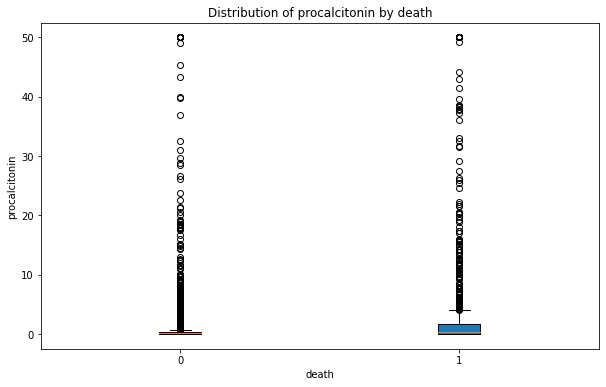

In [178]:
multiboxplot(data, 'procalcitonin', 'death')

Although the range of values is the same for both groups, patients who died have a higher density of greater procalcitonin levels compared to patients who survived. 

<a id="c23"></a>
### Death vs. Troponin

[Back to Contents](#Ind)

The normal range for troponin is between 0 and 0.04 ng/mL, where higher levels could indicate a heart condition like atrial fibrillation or damage to the heart muscle, usually as a result of heart attack. We expect patients who died from Covid-19 to have higher troponin levels compared to patients who survived.

In [179]:
describe_by_category(data, 'troponin', 'death', transpose=True)

death,0,1
count,"3,202.0000","1,023.0000"
mean,0.0348,0.1098
std,0.1095,0.5292
min,0.0000,0.0000
25%,0.0100,0.0100
50%,0.0100,0.0200
75%,0.0100,0.0700
max,2.3100,9.5600


Patients who died from Covid-19 had a mean troponin level of 0.11 ng/mL, which is elevated compared to the normal range. Patients who survived Covid-19 had a mean troponin level of 0.035 ng/mL, which is within the normal range for troponin. In addition, the range of troponin levels for patients who died from Covid-19 is more dispersed. 

In [180]:
correlations(data, 'death', ['troponin'])

,feature,r,rho
0,troponin,0.1150,0.2350


There is a medium to weak linear relationship (r = 0.12) and a stronger nonlinear relationship (rho = 0.24) between troponin and death. This variable may be a good candidate for an interaction term. 

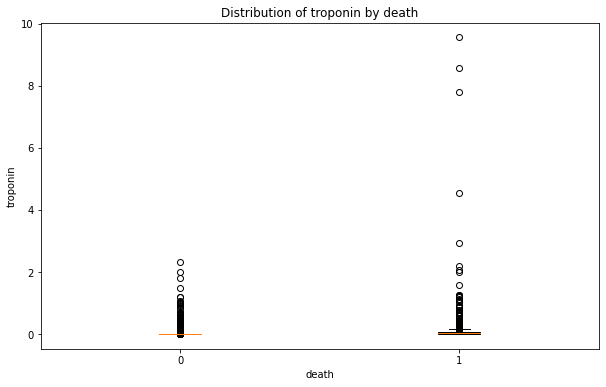

In [181]:
multiboxplot(data, 'troponin', 'death')

As the descriptive statistics showed, patient who died had higher troponin levels compared to patients who survived Covid-19. In addition, there are several instances among patients who died where the troponin levels are *extremely* high. As stated, we may benefit from using an interaction term with this variable.

<a id="c24"></a>
### Death vs. Length of Stay

[Back to Contents](#Ind)

As stated during the single variable exploration, its difficult to know how this variable will relate with `death`, so let's jump right into the descriptive statistics:

In [182]:
describe_by_category(data, 'length_of_stay', 'death', transpose=True)

death,0,1
count,"3,202.0000","1,023.0000"
mean,6.6427,8.8837
std,6.6808,7.4814
min,0.0000,0.0000
25%,2.0000,3.0000
50%,5.0000,6.0000
75%,9.0000,12.0000
max,56.0000,44.0000


Patients who died from Covid-19 stayed in the hospital for 8.88 days, on average. In comparison, patients who survived Covid-19 stayed in the hospital for 6.64 days, on average. The distribution of days is also skewed more to the right for patients who died, based on the quartiles and the medians. 

In [183]:
correlations(data, 'death', ['length_of_stay'])

,feature,r,rho
0,length_of_stay,0.1382,0.1547


There is a medium to weak linear relationship (r = 0.14) and a stronger nonlinear relationship (rho = 0.16) between the length of the hospital stay and death.

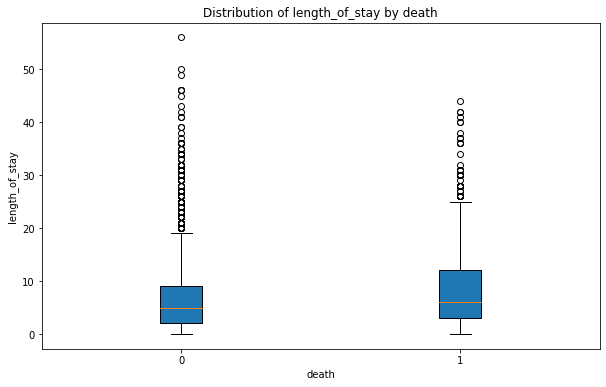

In [184]:
multiboxplot(data, 'length_of_stay', 'death')

Interestingly, the distribution of days at the hospital is more dispersed for patients who survived. Although the mean number of days at the hospital is greater for patients who died, patients who survived have more instances where they stayed in the hospital over 40 days. 